In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter

from matplotlib import font_manager
f_path = "/Library/Fonts/Arial Unicode.ttf"
font_manager.FontProperties(fname=f_path).get_name()
from matplotlib import rc
rc('font', family='Arial Unicode MS')

import warnings
warnings.filterwarnings('ignore')

# 1. 데이터 로드 및 확인

In [29]:
data = pd.read_csv("./sk_data/sk_raw_data.csv")

In [4]:
data.head()

,일자,요일,시간대,업종,시도,시군구,읍면동,통화건수
0,20161001,토,0,족발/보쌈,서울특별시,강남구,역삼동,5
1,20161001,토,0,치킨,서울특별시,성북구,성북동,5
2,20161001,토,0,피자,서울특별시,강동구,천호동,5
3,20161001,토,0,치킨,서울특별시,강서구,내발산동,20
4,20161001,토,0,치킨,서울특별시,강북구,번동,5


In [5]:
data.tail()

,일자,요일,시간대,업종,시도,시군구,읍면동,통화건수
4624227,20190930,월,23,족발/보쌈,서울특별시,중구,서소문동,5
4624228,20190930,월,23,족발/보쌈,서울특별시,중구,신당동,5
4624229,20190930,월,23,족발/보쌈,서울특별시,광진구,구의동,5
4624230,20190930,월,23,족발/보쌈,서울특별시,서초구,양재동,5
4624231,20190930,월,23,치킨,서울특별시,중구,장충동2가,5


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4624232 entries, 0 to 4624231
Data columns (total 8 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   일자      int64 
 1   요일      object
 2   시간대     int64 
 3   업종      object
 4   시도      object
 5   시군구     object
 6   읍면동     object
 7   통화건수    int64 
dtypes: int64(3), object(5)
memory usage: 282.2+ MB


In [7]:
data.isnull().sum()

일자      0
요일      0
시간대     0
업종      0
시도      0
시군구     0
읍면동     0
통화건수    0
dtype: int64

In [4]:
df_by_date = pd.read_pickle("df_by_date.pkl")

In [16]:
df = pd.read_pickle("df_by_date_201610_201909")

### 연, 월, 시간, 평일/주말에 따른 주문량
- 연도데이터만 2013~2019
- 나머지는 2016.10~2019.09

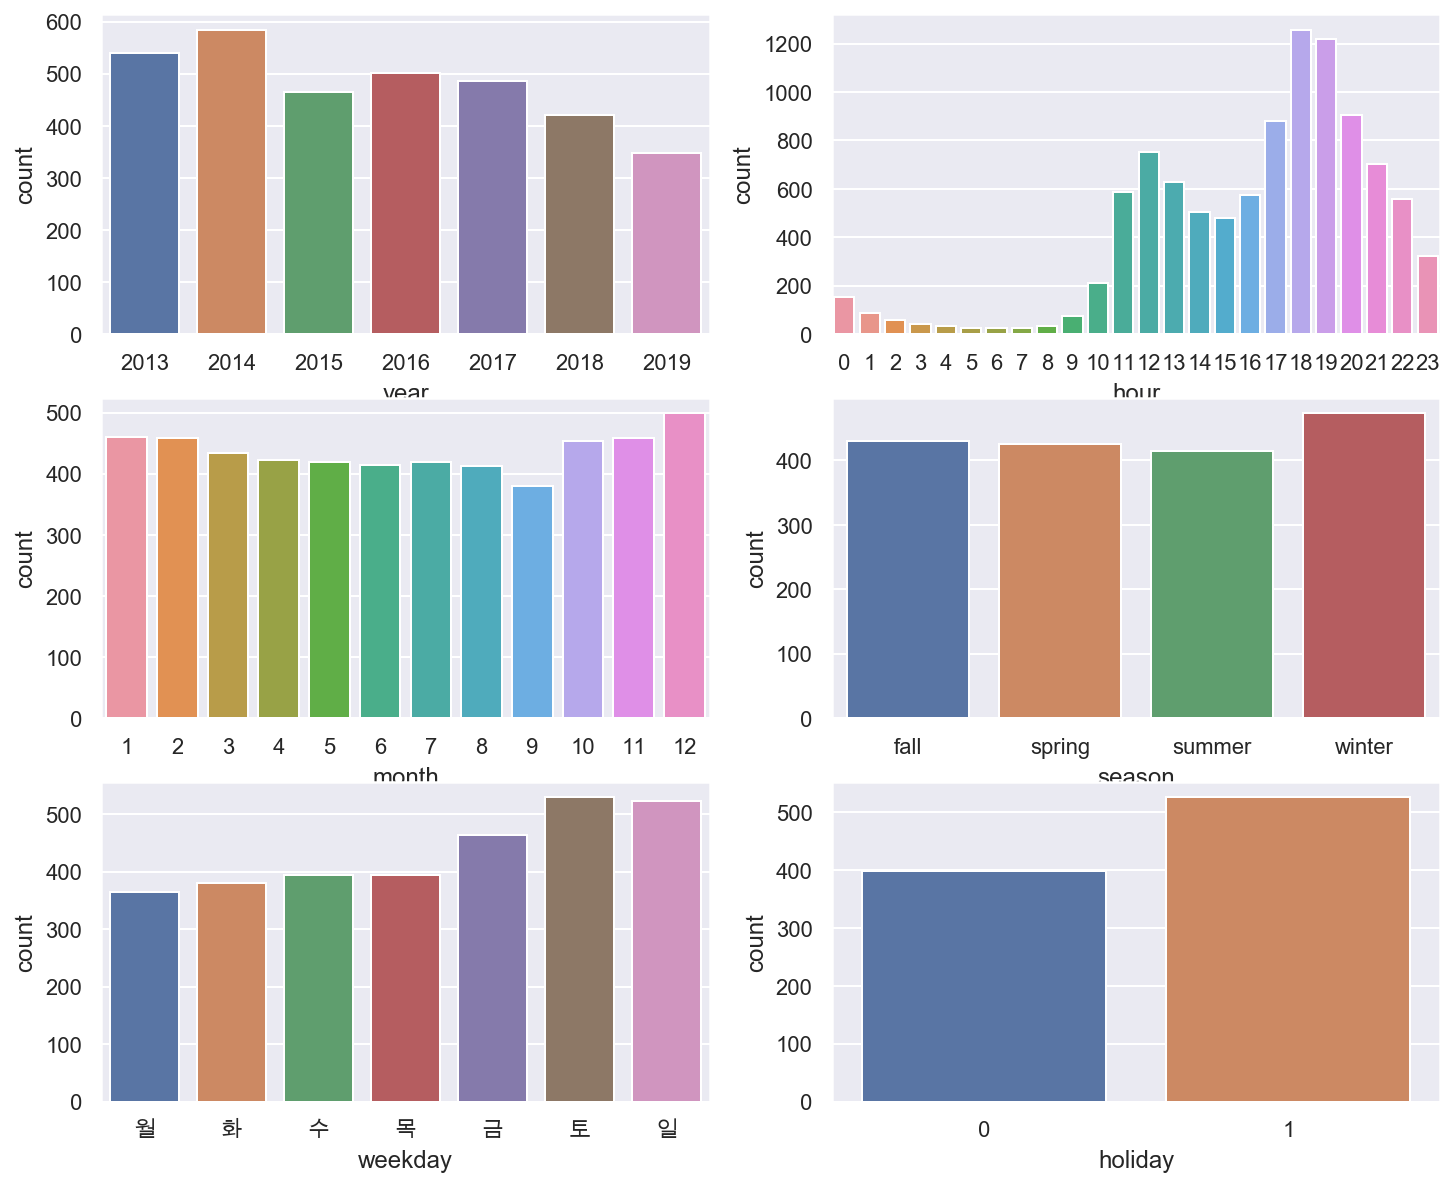

In [10]:
fig = plt.figure(figsize=[12, 10])
ax1 = fig.add_subplot(3, 2, 1)
ax1 = sns.barplot(x='year', y='count',
                  data=df_by_date.groupby('year')['count'].mean().reset_index(), )

ax2 = fig.add_subplot(3, 2, 2)
ax2 = sns.barplot(x='hour', y='count',
                  data=df.groupby('hour')['count'].mean().reset_index())



ax3 = fig.add_subplot(3, 2, 3)
ax3 = sns.barplot(x='month', y='count',
                  data=df.groupby('month')['count'].mean().reset_index())


ax4 = fig.add_subplot(3, 2, 4)
ax4 = sns.barplot(x='season', y='count',
                  data=df.groupby('season')['count'].mean().reset_index())

ax5 = fig.add_subplot(3, 2, 5)
ax5 = sns.barplot(x='weekday', y='count', order = ["월","화","수","목","금","토","일"],
                  data=df.groupby('weekday')['count'].mean().reset_index())

ax6 = fig.add_subplot(3, 2, 6)
ax6 = sns.barplot(x='holiday', y='count',
                  data=df.groupby('holiday')['count'].mean().reset_index())

In [11]:
# 1. 연도별 주문량 추이는 배달어플 이용자의 증가에 따라 통화량은 줄어든다
# 2. 시간대별 전체 주문량 / 점심, 저녁에 몰려있고 점심보다 저녁 주문량이 많음
# 3-4. 겨울철 주문량이 다른 계절 주문량보다 많다. 
# 5-6. 주말 주문량이 평일 주문량보다 많다.

### 시간과 계절, 요일, 메뉴에 따른 주문량

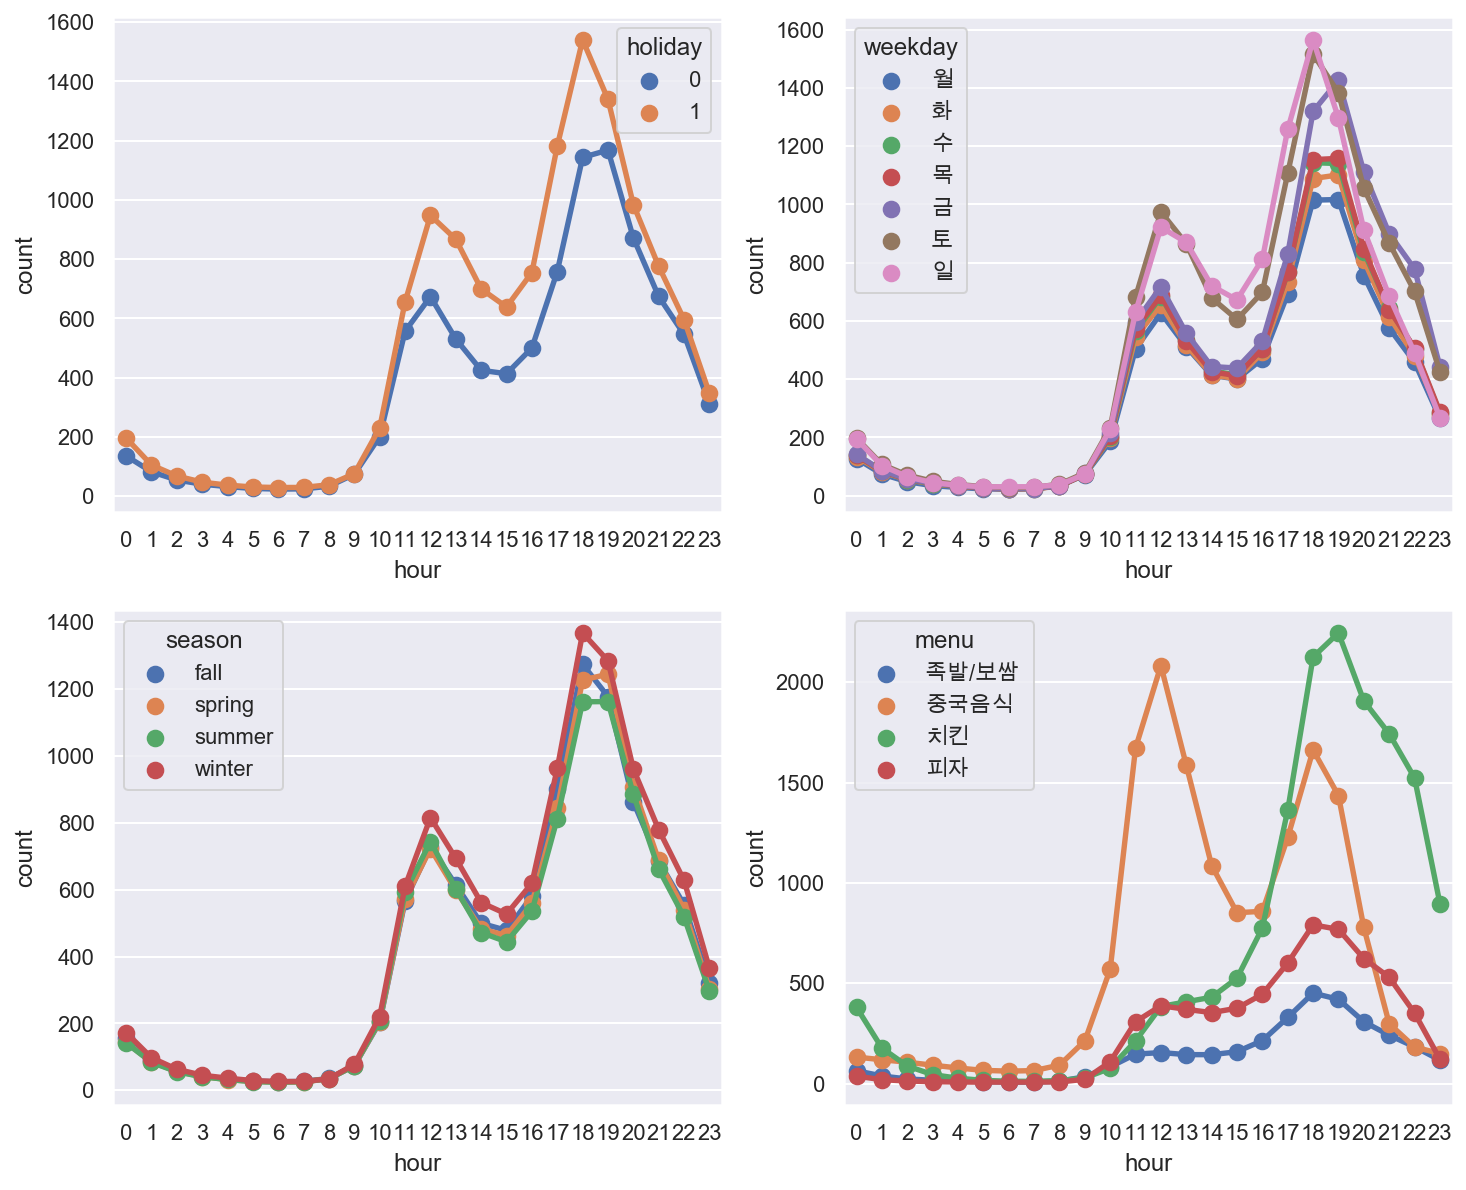

In [14]:
fig = plt.figure(figsize=(12, 10))

# 1. 시간과 휴일에 따른 count
ax1 = fig.add_subplot(2, 2, 1)
ax1 = sns.pointplot(x='hour', y='count', hue="holiday",
                    data=df.groupby(['holiday', 'hour'])['count'].mean().reset_index())

# 2. 시간과 요일에 따른 count
ax2 = fig.add_subplot(2, 2, 2)
ax2 = sns.pointplot(x='hour', y='count', hue="weekday", hue_order=['월', '화',
                                                                   '수', '목',
                                                                   '금', '토',
                                                                   "일"],
                    data=df.groupby(['weekday', 'hour'])['count'].mean().reset_index())
# 3. 시간과 계절에 따른 count
ax3 = fig.add_subplot(2, 2, 3)
ax3 = sns.pointplot(x='hour', y='count', hue="season",
                    data=df.groupby(['season', 'hour'])['count'].mean().reset_index())

# 4. 시간과 메뉴에 따른 count
ax4 = fig.add_subplot(2, 2, 4)
ax4 = sns.pointplot(x='hour', y='count', hue="menu",
                    data=df.groupby(['menu', 'hour'])['count'].mean().reset_index())



In [15]:
# 1-2. 주말의 저녁 주문 시간대가 평일의 저녁 주문시간대보다 이르다
# 3. 겨울, 가을의 저녁 주문 시간대가 봄, 여름의 저녁 주문 시간대보다 이르다
# 1-3. 점심 주문 시간대는 크게 다르지 않음
# 4. 점심에는 중국음식이 저녁에는 치킨이 대세 주문음식

# 날짜 / 업종별 주문량

In [103]:
date_order = data.pivot_table("통화건수", "일자", "업종").round(1).reset_index()

In [9]:
date_order.head()

업종,일자,족발/보쌈,중식,치킨,피자
0,20161001,5.5,10.2,11.8,6.7
1,20161002,5.7,12.1,13.0,7.4
2,20161003,5.4,10.4,10.5,6.7
3,20161004,5.2,8.4,8.5,5.8
4,20161005,5.3,8.4,8.9,5.9


In [104]:
date_order["일자"] = date_order["일자"].astype("str")
date_order["일자"] = pd.to_datetime(date_order["일자"])

In [105]:
date_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일자      1095 non-null   datetime64[ns]
 1   족발/보쌈   1095 non-null   float64       
 2   중식      1095 non-null   float64       
 3   치킨      1095 non-null   float64       
 4   피자      1095 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 42.9 KB


In [12]:
date_order.head()

업종,일자,족발/보쌈,중식,치킨,피자
0,2016-10-01,5.5,10.2,11.8,6.7
1,2016-10-02,5.7,12.1,13.0,7.4
2,2016-10-03,5.4,10.4,10.5,6.7
3,2016-10-04,5.2,8.4,8.5,5.8
4,2016-10-05,5.3,8.4,8.9,5.9


In [13]:
# date_order.to_excel("sk_date_order.xlsx")

### 2016.10.01.~2019.09.30. 총 3년간 데이터 분석

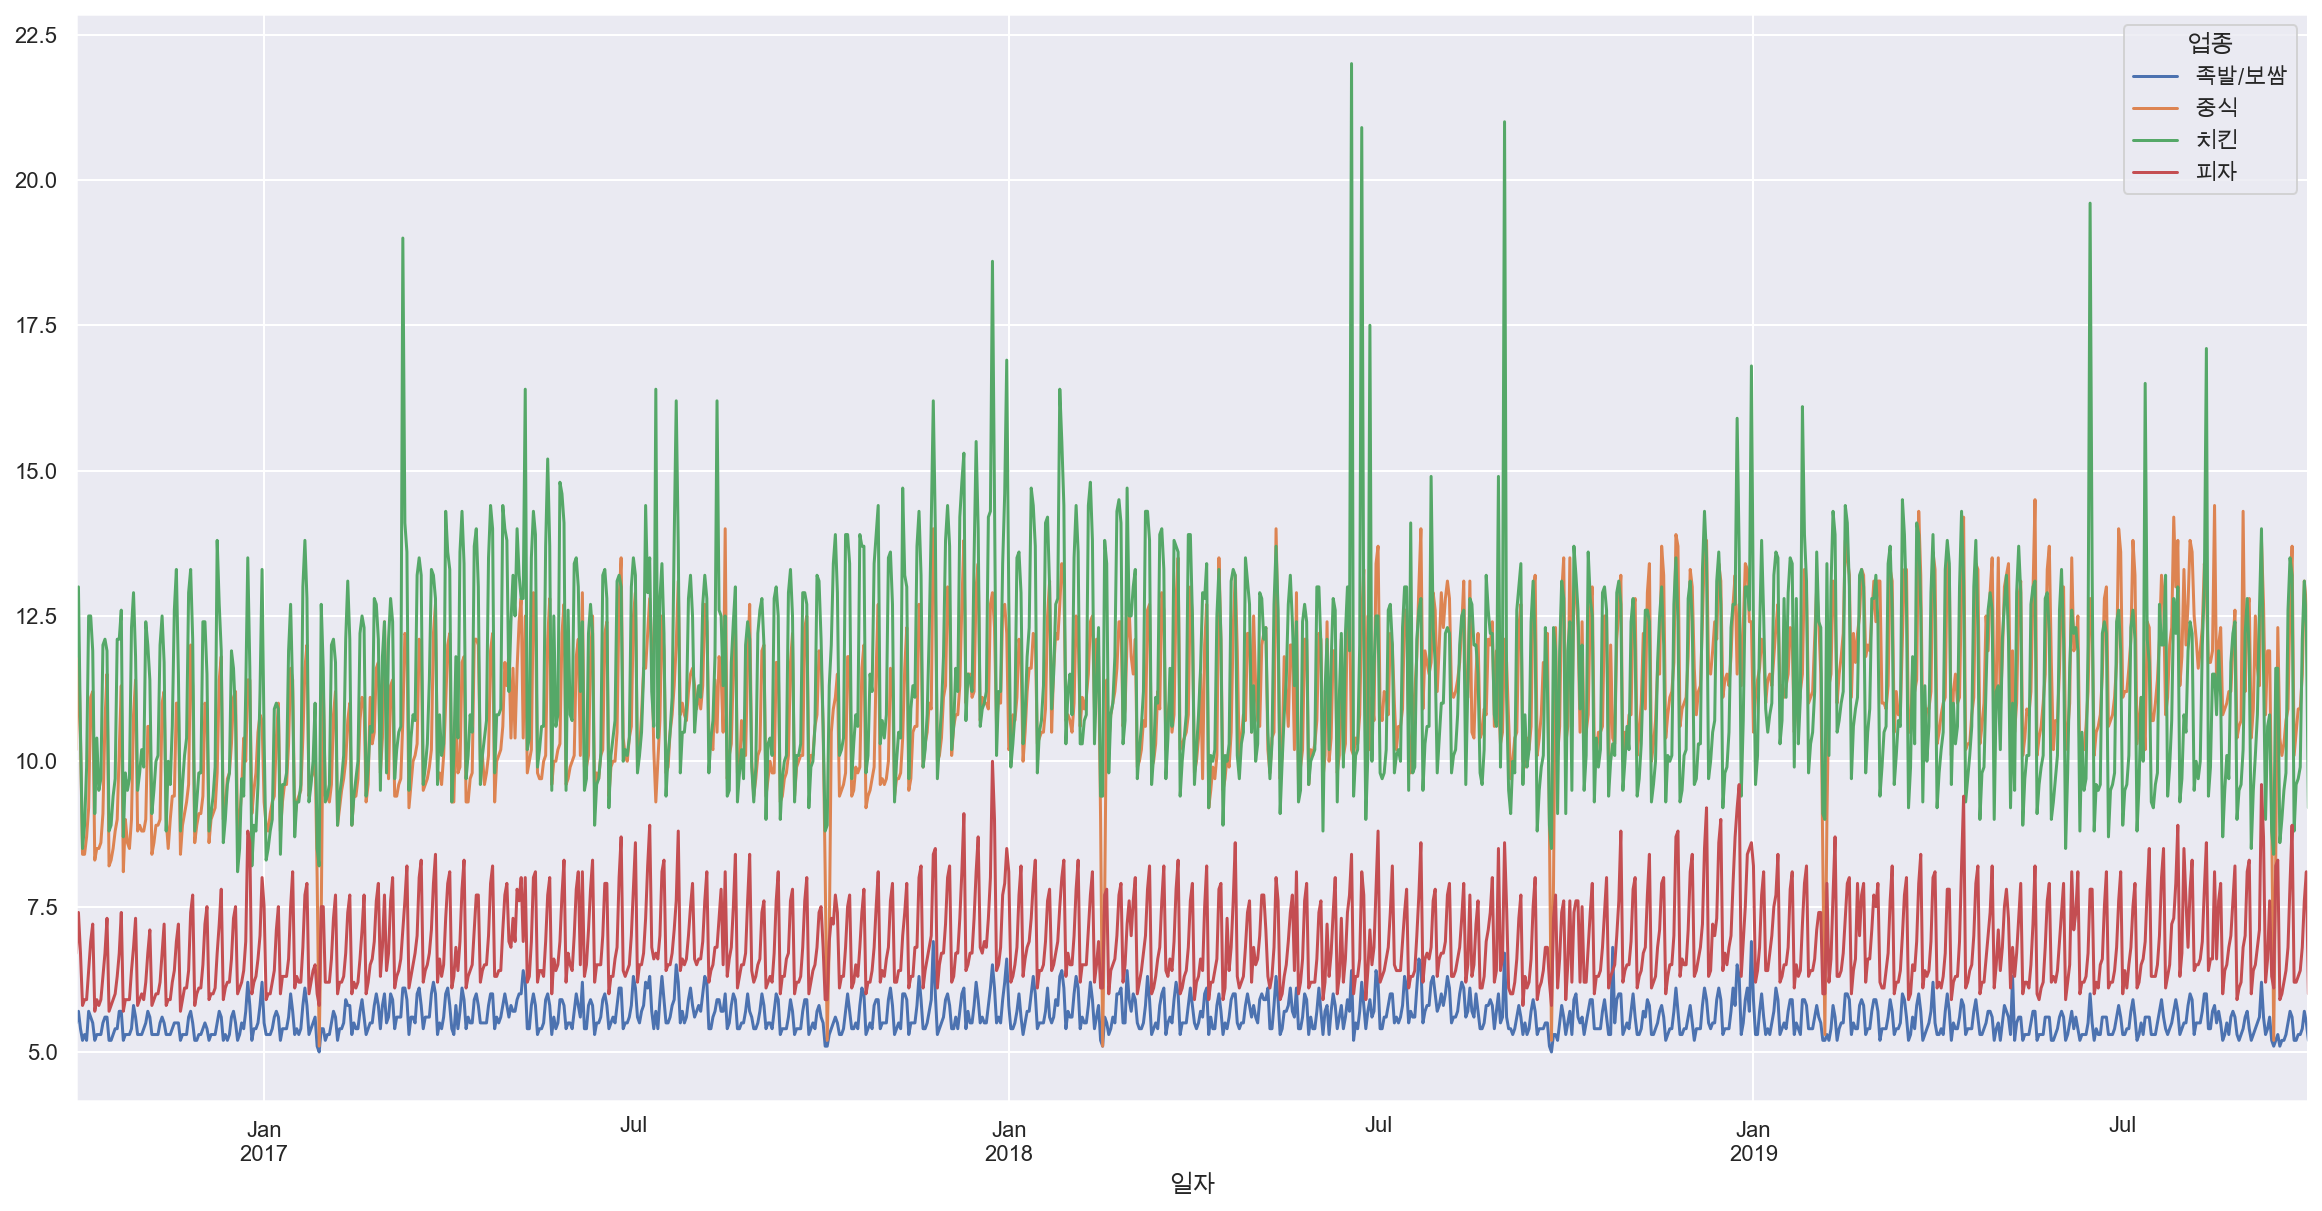

In [14]:
date_order.plot.line(x="일자",figsize=(20,10))
plt.grid("white")
plt.show()

### 월별 특성 분석

In [106]:
date_order = date_order.set_index("일자")
monthly_order = date_order.resample('MS').mean().round(1).reset_index()

In [107]:
monthly_order.head()

업종,일자,족발/보쌈,중식,치킨,피자
0,2016-10-01,5.4,9.5,10.7,6.3
1,2016-11-01,5.4,9.5,10.7,6.3
2,2016-12-01,5.5,10.0,10.5,6.7
3,2017-01-01,5.5,9.6,10.2,6.6
4,2017-02-01,5.6,10.1,10.9,6.7


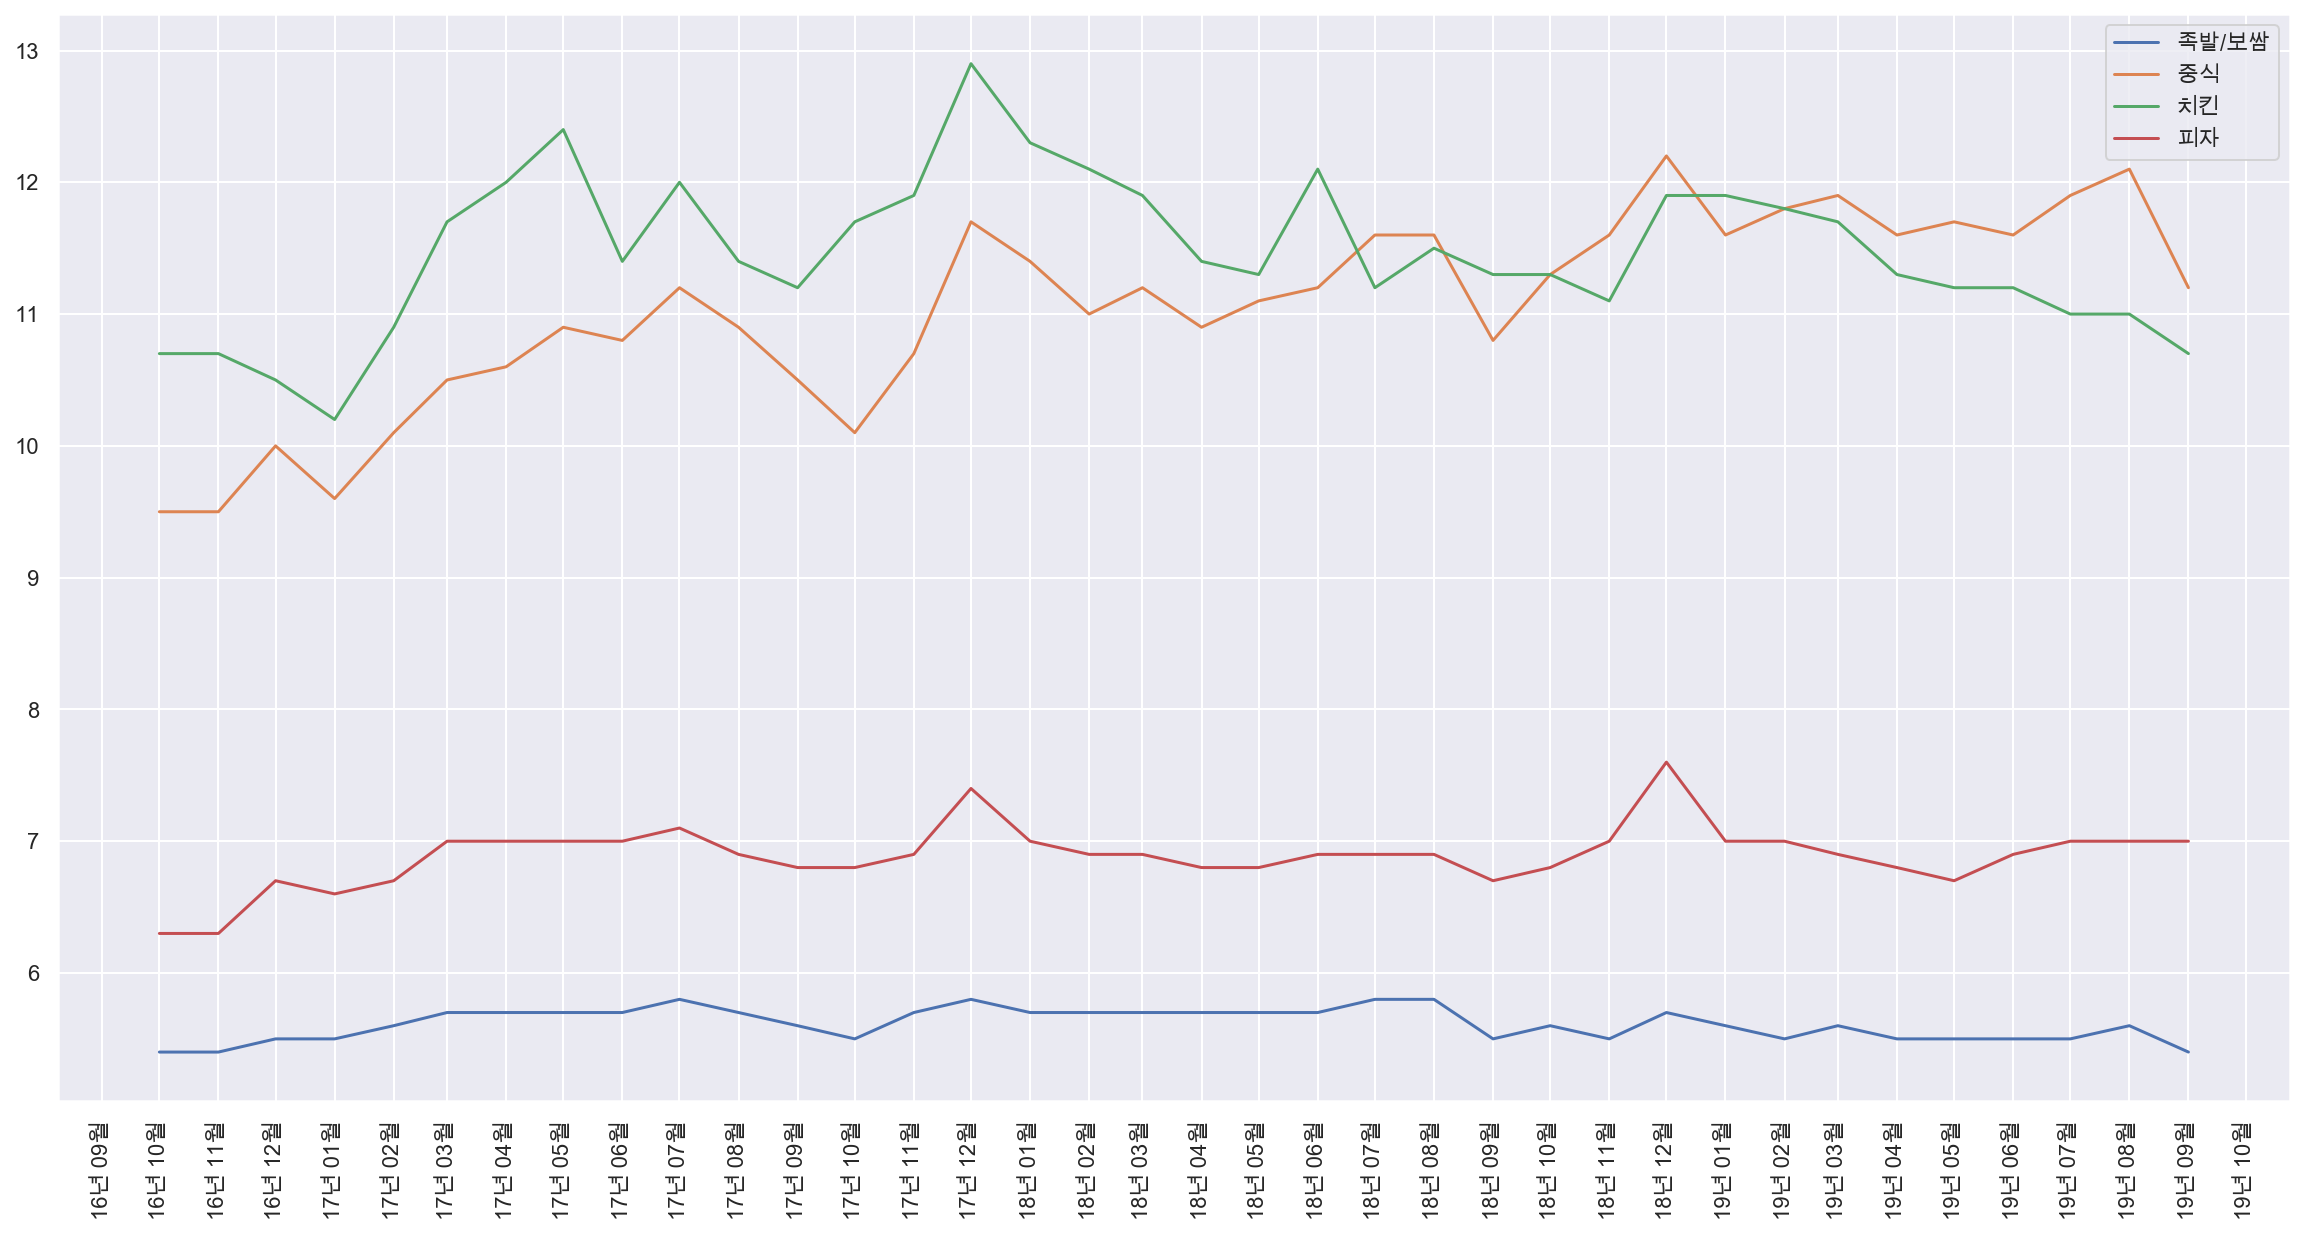

In [110]:
months = MonthLocator()  # every month
fig, ax = plt.subplots(figsize=(20,10))

ax.plot_date(monthly_order["일자"] , \
             monthly_order[["족발/보쌈","중식","치킨","피자"]], '-')      # x: datetime, y: random % values
ax.xaxis.set_major_locator(months)   # define xtick major location
monFmt = DateFormatter('%y년 %m월')      # define xtick string format
ax.xaxis.set_major_locator(months)   # apply xtick location
ax.xaxis.set_major_formatter(monFmt) # apply xtick label
plt.xticks(rotation=90)
plt.legend(monthly_order[["족발/보쌈","중식","치킨","피자"]])
plt.show()

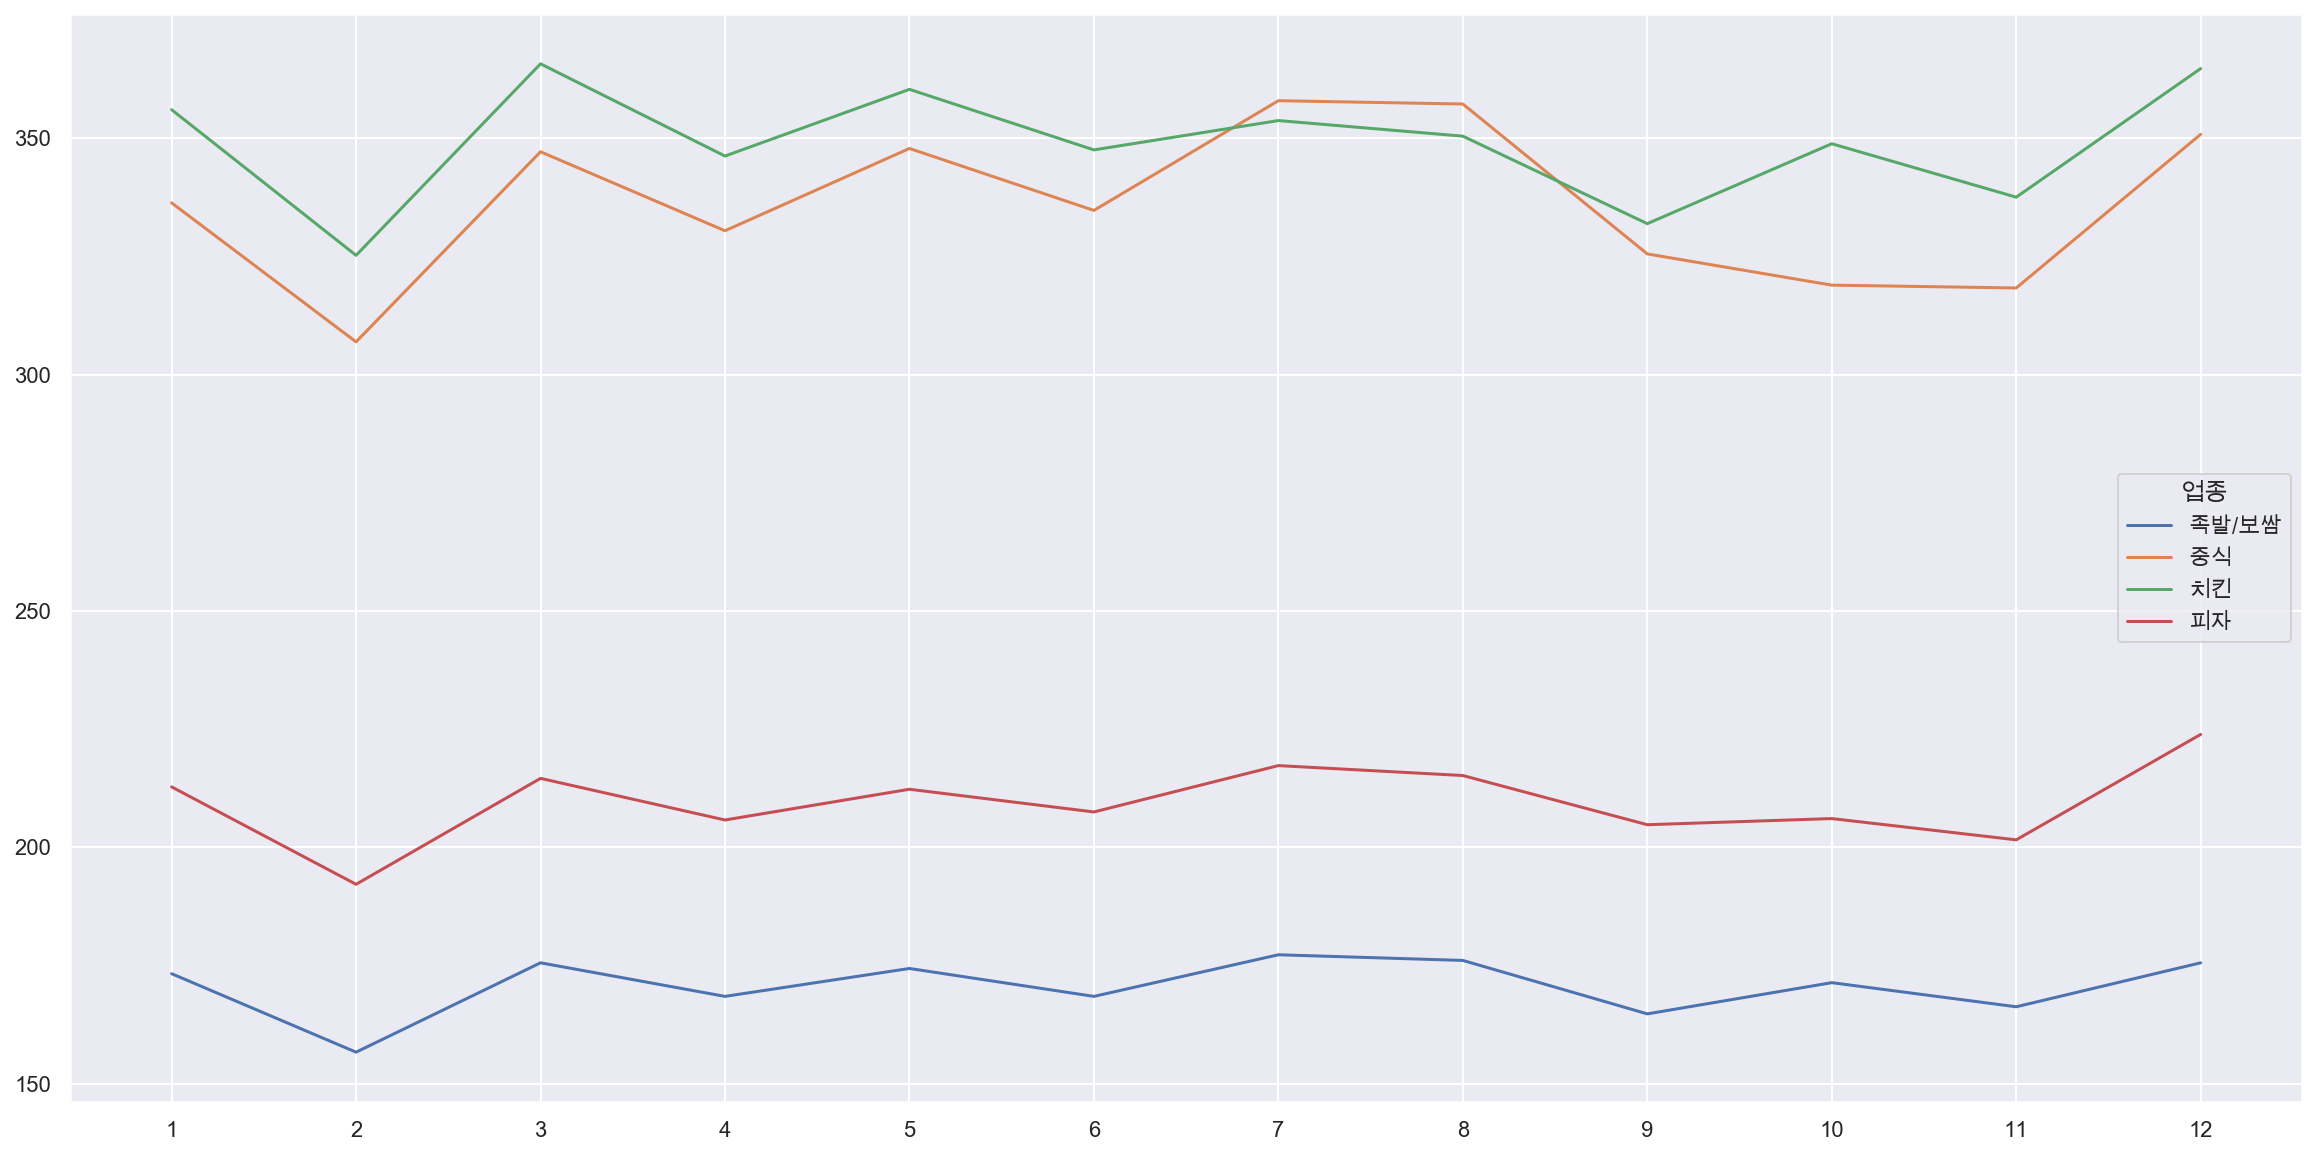

In [109]:
monthly_order_2 = date_order.resample('M').sum().reset_index()
monthly_order_2["일자"] = monthly_order_2["일자"].dt.month
monthly_order_2 = monthly_order_2.groupby("일자").mean().round(1)
monthly_order_2.plot.line(figsize=(20,10))
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.xlabel(None)
plt.show()

In [117]:
col = ["족발/보쌈", "중식", "치킨", "피자"]
monthly_order_2_norm = ((monthly_order_2[col]-monthly_order_2[col].min()) / (monthly_order_2[col].max()-monthly_order_2[col].min())).round(3)
monthly_order_2_norm.head()

업종,족발/보쌈,중식,치킨,피자
일자,,,,
1,0.806,0.576,0.760,0.650
2,0.000,0.000,0.000,0.000
3,0.917,0.788,1.000,0.707
4,0.573,0.461,0.519,0.429
5,0.859,0.802,0.867,0.634


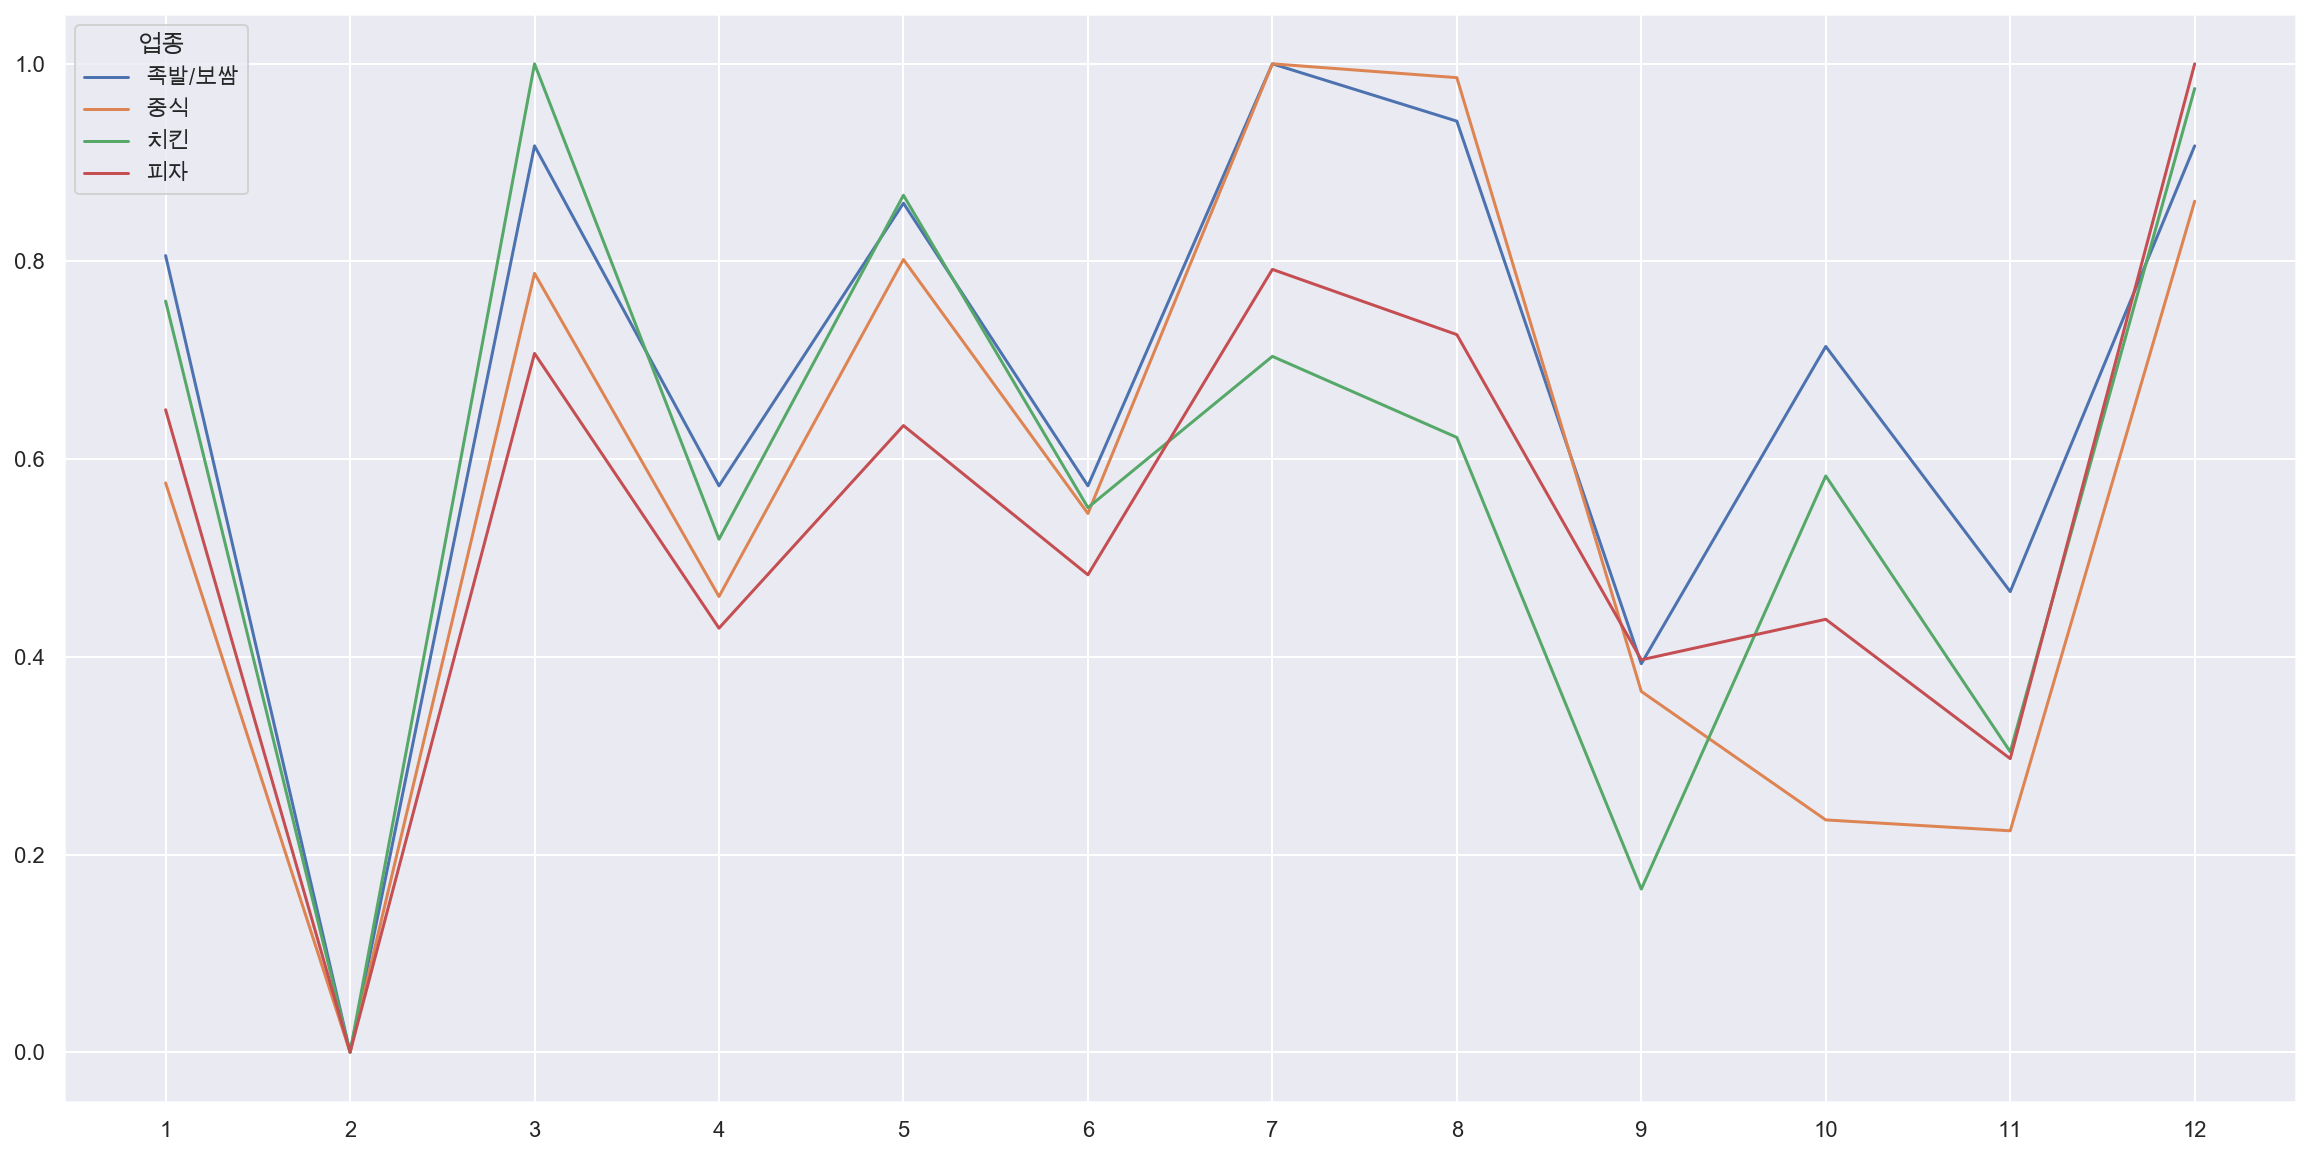

In [118]:
monthly_order_2_norm.plot.line(figsize=(20,10))
plt.xlabel(None)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.show()

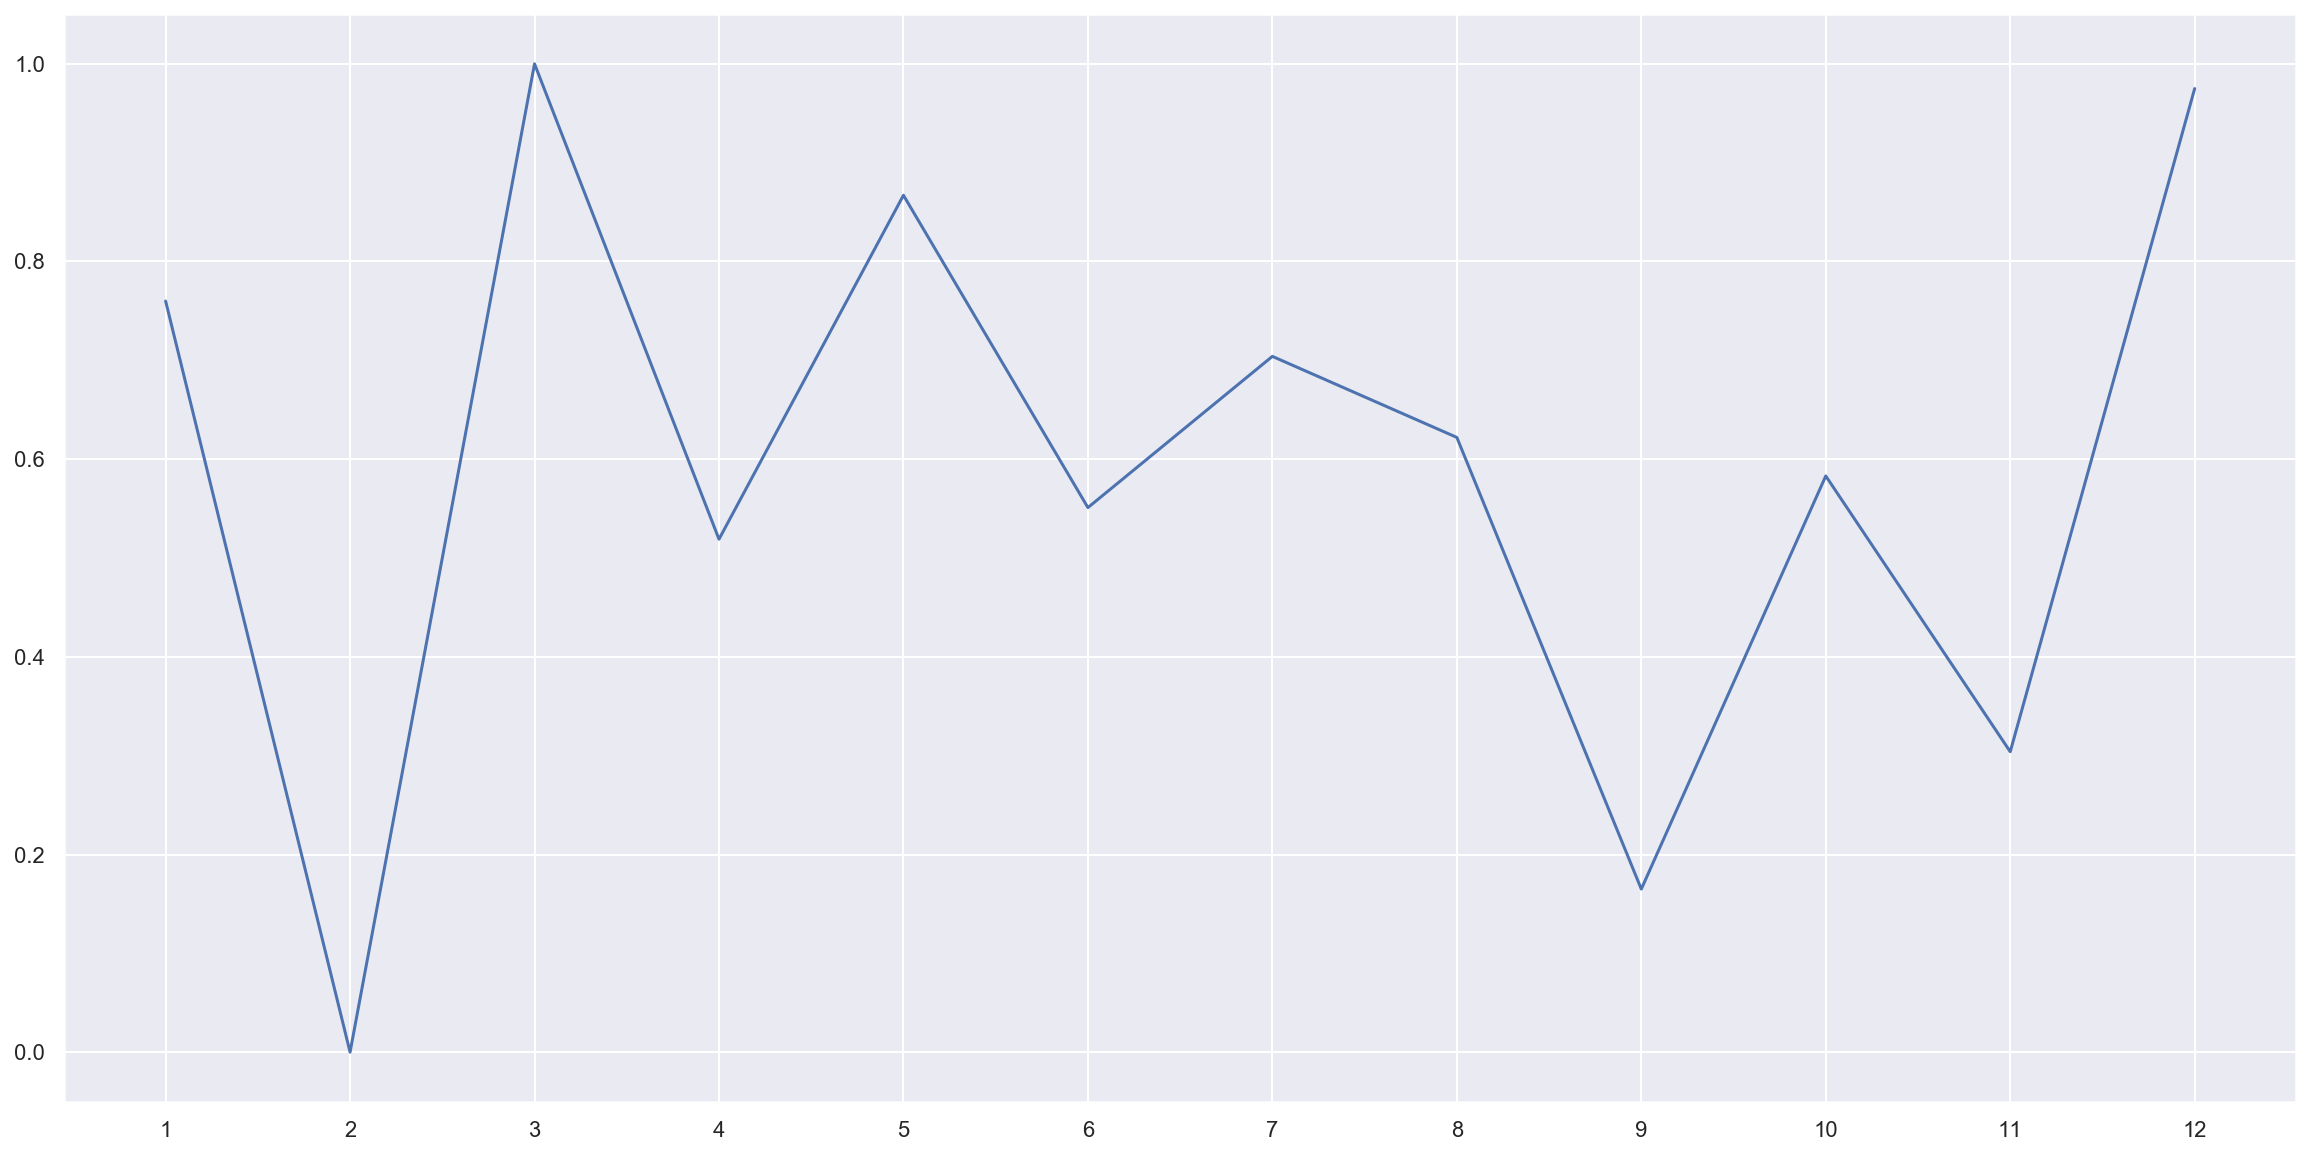

In [119]:
monthly_order_2_norm["치킨"].plot.line(figsize=(20,10))
plt.xlabel(None)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.show()

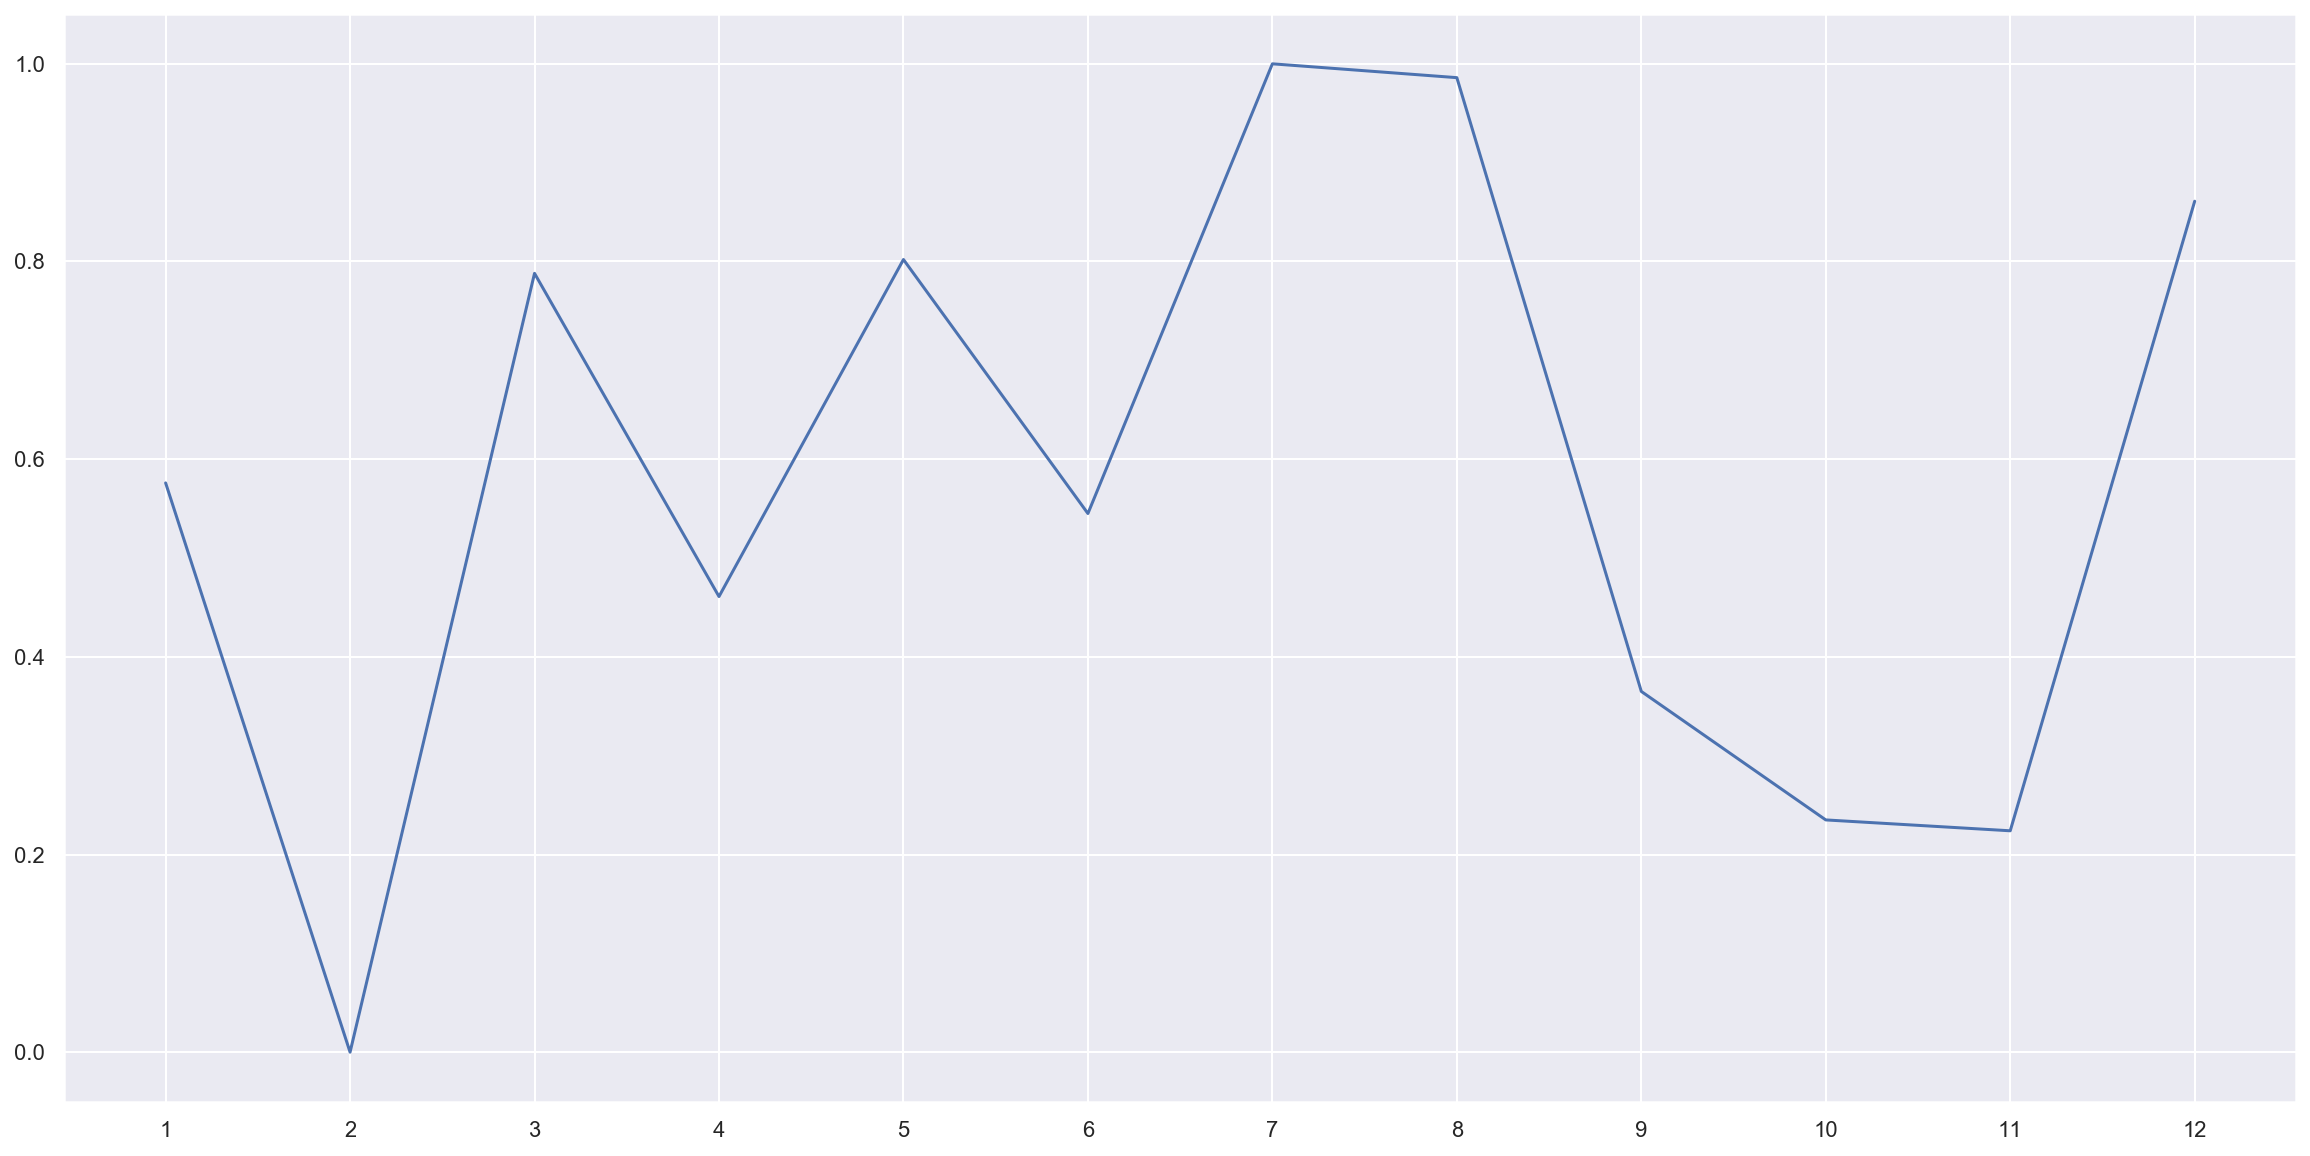

In [120]:
monthly_order_2_norm["중식"].plot.line(figsize=(20,10))
plt.xlabel(None)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.show()

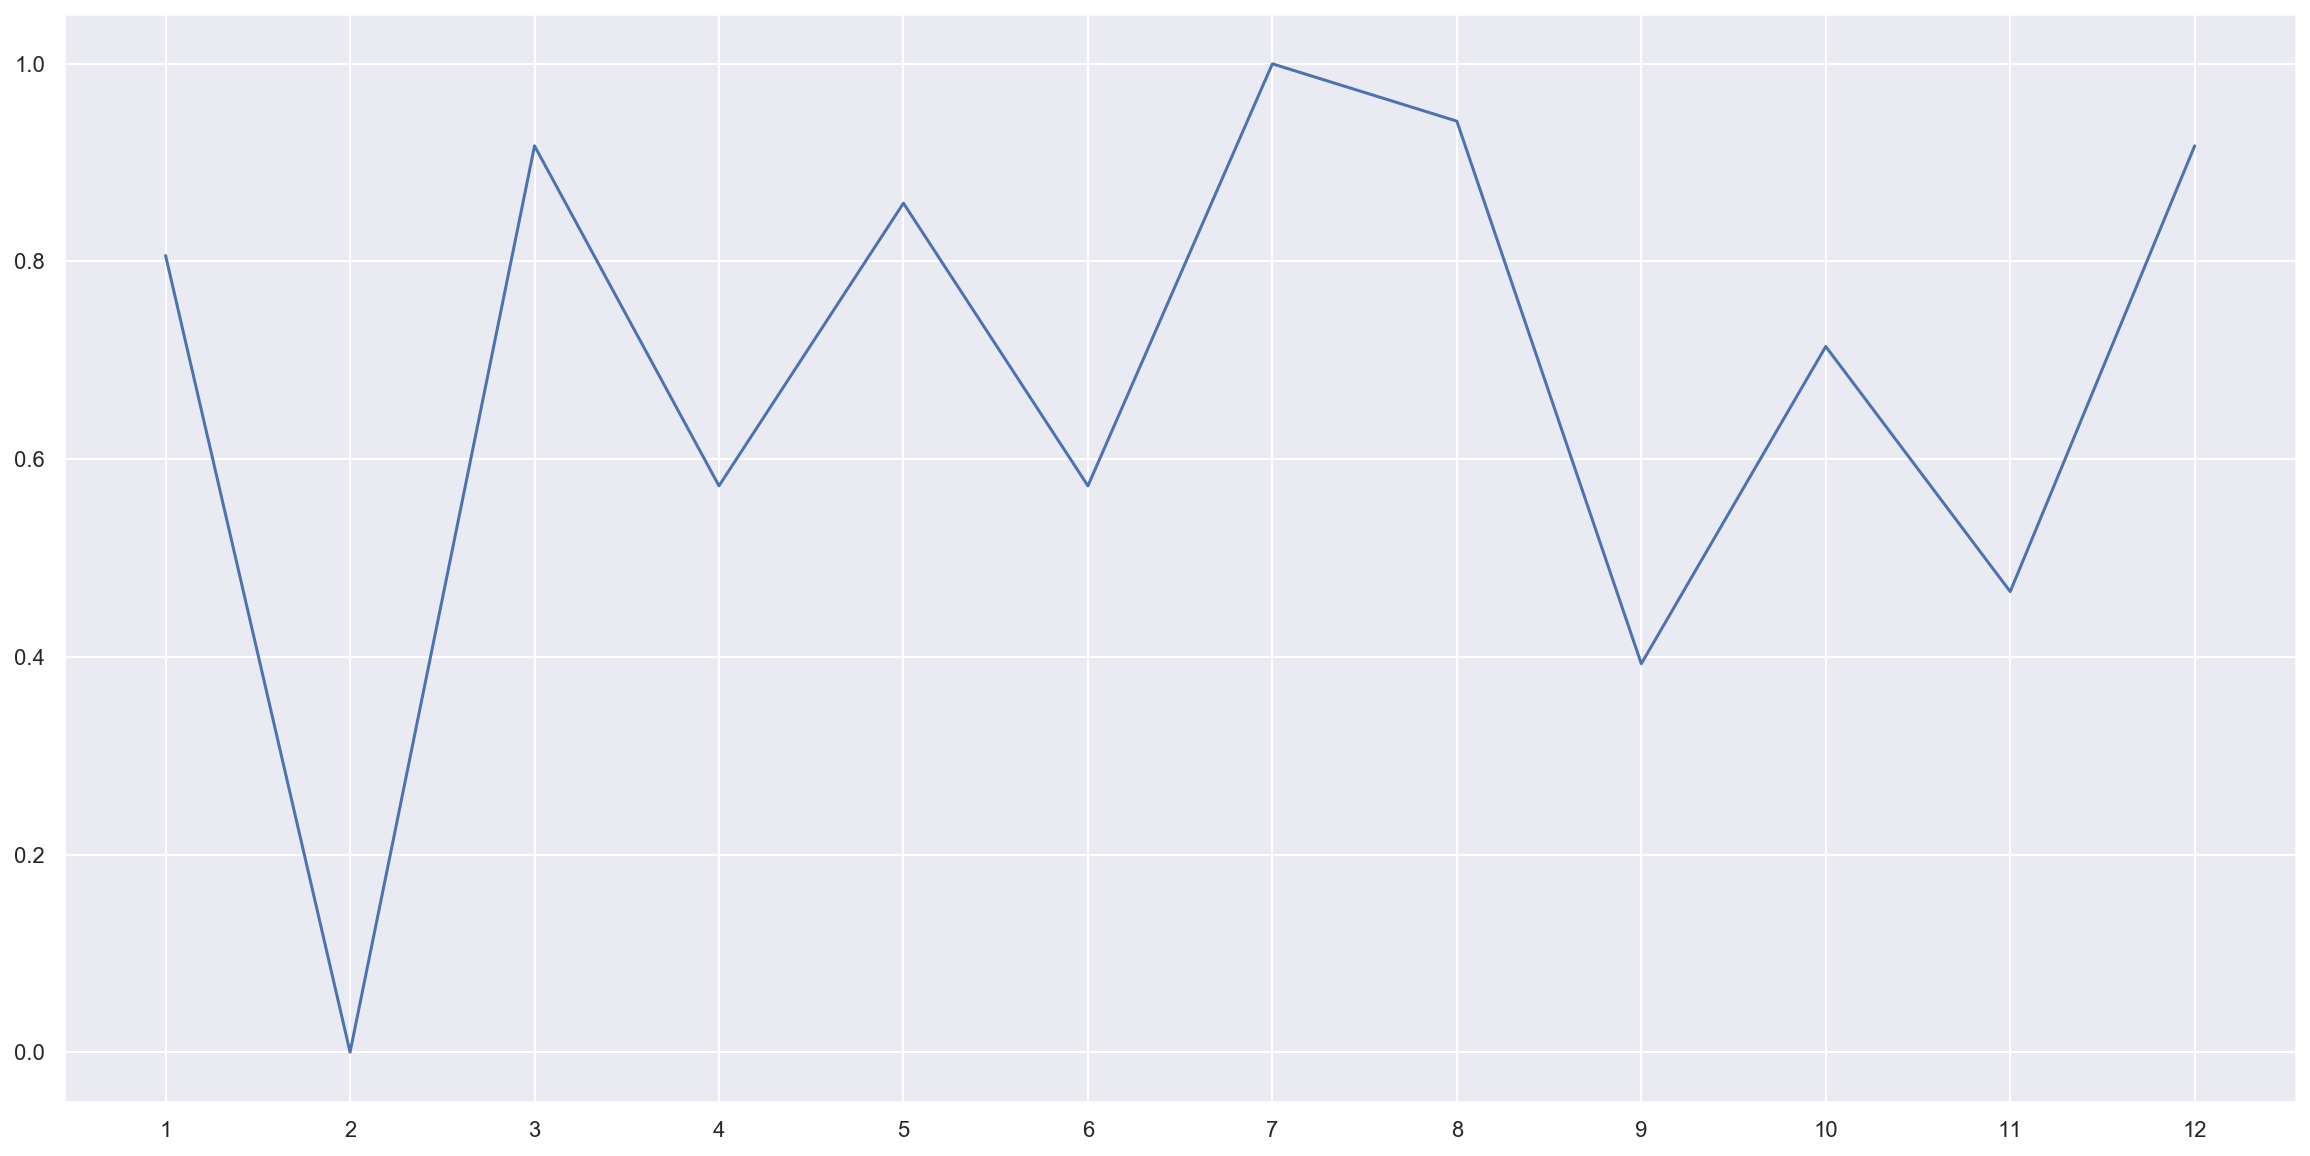

In [121]:
monthly_order_2_norm["족발/보쌈"].plot.line(figsize=(20,10))
plt.xlabel(None)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.show()

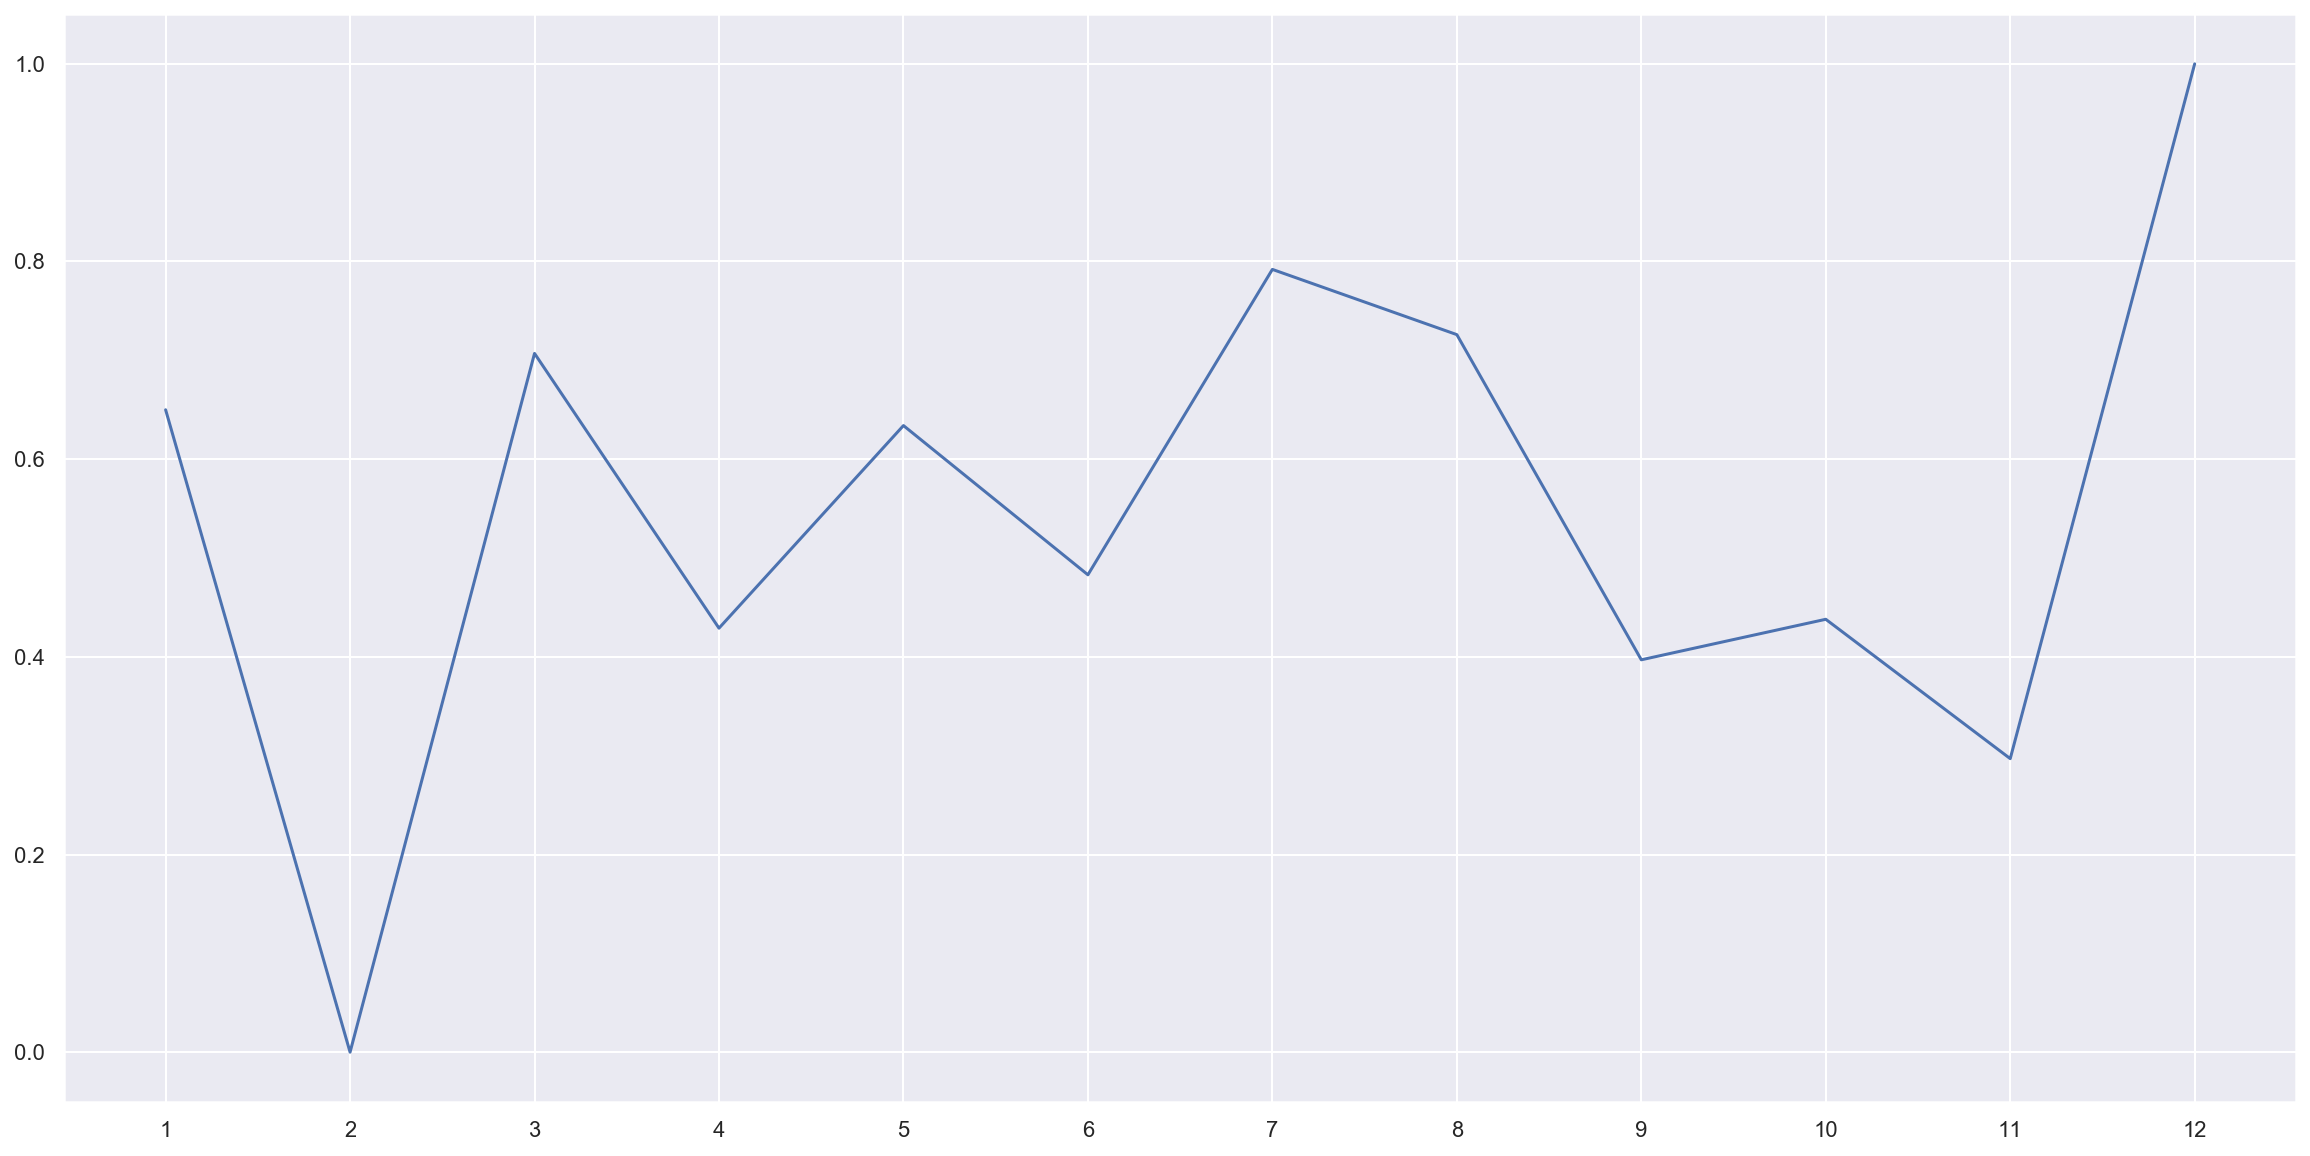

In [122]:
monthly_order_2_norm["피자"].plot.line(figsize=(20,10))
plt.xlabel(None)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.show()

### 일별 특성 분석

In [1]:
date_order.boxplot(figsize=(12,8));

NameError: name 'date_order' is not defined

In [359]:
# iqr 구하기

In [361]:
def iqr(arr):
    iqr = (np.percentile(arr, 75) - np.percentile(arr, 25)).round(1)
    upper_fence = (np.percentile(arr, 75) + iqr*1.5).round(1)
    lower_fence = (np.percentile(arr, 25) - iqr*1.5).round(1)
    return "iqr: {}, upper_fence: {}, lower_fence: {}".format(iqr, upper_fence, lower_fence)

In [362]:
iqr(date_order["족발/보쌈"]), iqr(date_order["중식"]), iqr(date_order["치킨"]), iqr(date_order["피자"])

('iqr: 0.4, upper_fence: 6.4, lower_fence: 4.8',
 'iqr: 2.0, upper_fence: 15.1, lower_fence: 7.1',
 'iqr: 2.8, upper_fence: 17.0, lower_fence: 5.8',
 'iqr: 1.2, upper_fence: 9.3, lower_fence: 4.5')

In [365]:
date_order[date_order["족발/보쌈"] > 6.4]

업종,족발/보쌈,중식,치킨,피자
일자,,,,
2017-07-22,6.5,12.0,16.2,7.6
2017-11-25,6.9,14.0,16.2,8.4
2017-12-24,6.5,12.9,18.6,10.0
2017-12-31,6.6,12.2,16.9,8.5
2018-07-21,6.6,13.0,12.6,7.7
2018-07-22,6.5,14.0,12.8,8.6
2018-09-01,6.7,12.1,21.0,8.6
2018-10-24,6.8,10.4,10.3,6.4
2018-12-24,6.5,11.5,15.9,9.2


In [366]:
date_order[date_order["중식"] < 7.1]

업종,족발/보쌈,중식,치킨,피자
일자,,,,
2017-01-28,5.0,5.1,8.2,5.8
2017-10-04,5.1,5.2,8.9,5.9
2017-10-05,5.3,6.9,11.3,6.9
2018-02-16,5.1,5.1,9.4,6.1
2018-09-24,5.0,5.2,8.5,5.8
2019-02-05,5.2,5.3,9.0,6.0
2019-09-13,5.1,5.2,8.4,6.1


In [363]:
date_order[date_order["치킨"] > 17.0]

업종,족발/보쌈,중식,치킨,피자
일자,,,,
2017-03-10,6.1,10.7,19.0,7.1
2017-12-24,6.5,12.9,18.6,10.0
2018-06-18,6.4,10.2,22.0,8.4
2018-06-23,6.2,12.5,20.9,8.1
2018-06-27,5.9,10.2,17.5,7.1
2018-09-01,6.7,12.1,21.0,8.6
2019-06-15,6.0,12.8,19.6,7.8
2019-08-11,6.0,12.9,17.1,8.6


In [364]:
date_order[date_order["피자"] > 9.3]

업종,족발/보쌈,중식,치킨,피자
일자,,,,
2017-12-24,6.5,12.9,18.6,10.0
2018-12-25,6.3,12.7,13.6,9.6
2019-04-14,5.8,14.2,13.1,9.4
2019-09-07,6.2,13.8,14.0,9.6


### 요일 / 업종별 주문량

In [22]:
day_order = data.pivot_table("통화건수", "요일", "업종").round(1)
day_order_sort = pd.DataFrame(columns=["요일", "족발/보쌈", "중식", "치킨", "피자"])

day_order_sort.loc[0] = day_order.loc["월"]
day_order_sort.loc[1] = day_order.loc["화"]ㅓㅗ
day_order_sort.loc[2] = day_order.loc["수"]
day_order_sort.loc[3] = day_order.loc["목"]
day_order_sort.loc[4] = day_order.loc["금"]
day_order_sort.loc[5] = day_order.loc["토"]
day_order_sort.loc[6] = day_order.loc["일"]
day_order_sort["요일"] = ["월", "화", "수", "목", "금", "토", "일"]
day_order_sort.set_index("요일")

,족발/보쌈,중식,치킨,피자
요일,,,,
월,5.4,10.1,9.9,6.3
화,5.5,10.3,10.3,6.4
수,5.5,10.5,10.6,6.5
목,5.5,10.5,10.6,6.5
금,5.7,10.8,13.0,6.9
토,6.0,12.2,13.4,7.6
일,5.8,12.3,12.8,8.0


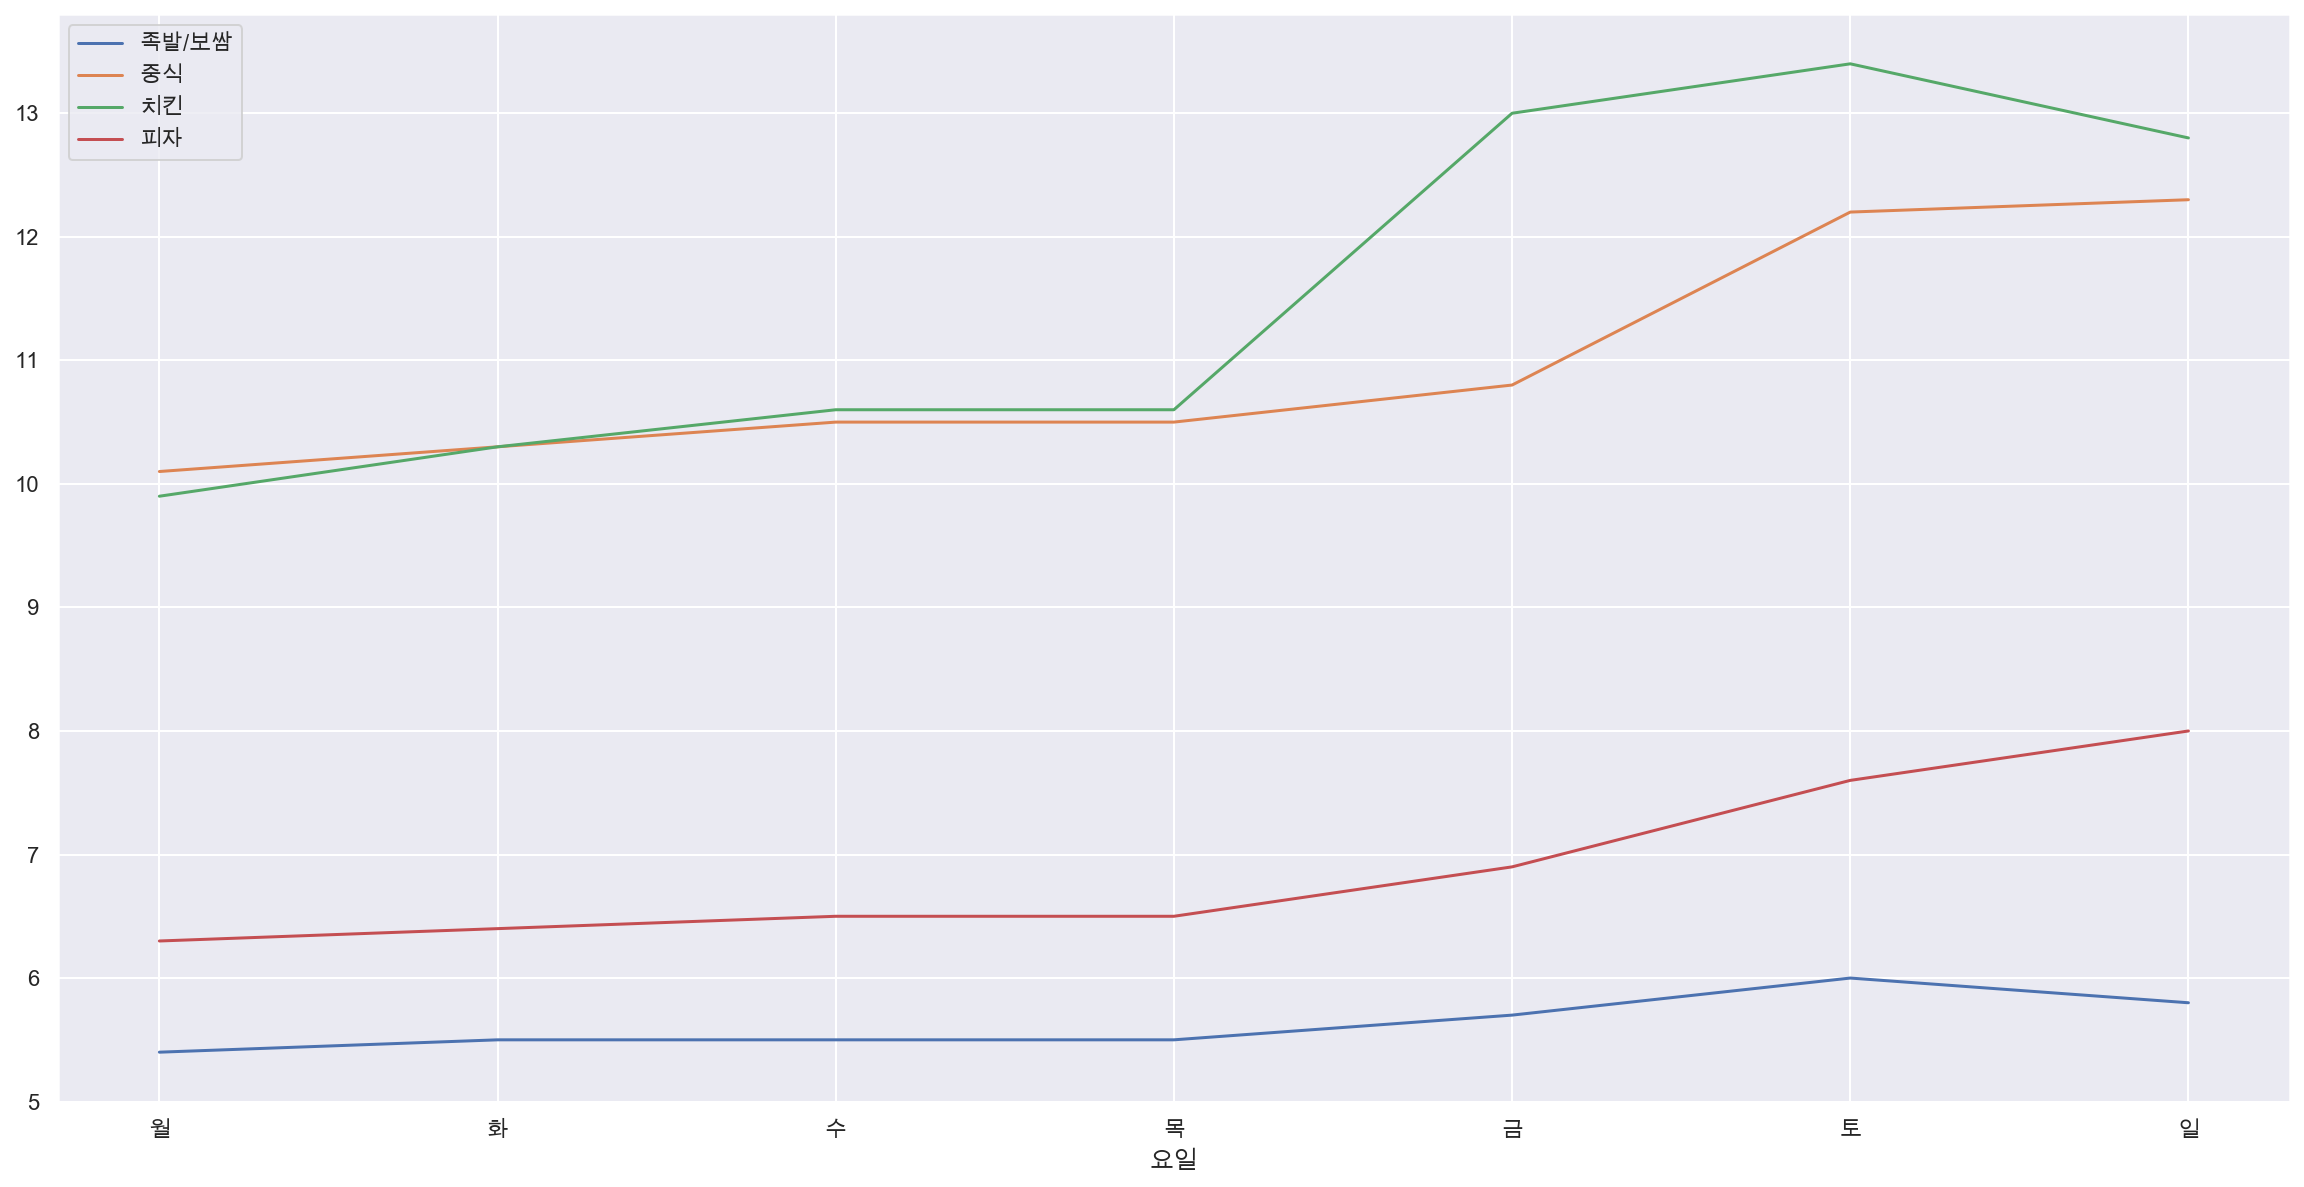

In [23]:
day_order_sort.plot.line(x="요일", figsize=(20,10))
plt.show()

### 요일 / 업종별 주문량 (정규화)

In [14]:
day_order_norm = pd.concat([day_order_sort["요일"], \
                            (day_order_sort[col]-day_order_sort[col].min()) / (day_order_sort[col].max()-day_order_sort[col].min())], axis=1)
day_order_norm

,요일,족발/보쌈,중식,치킨,피자
0,월,0.000000,0.000000,0.000000,0.000000
1,화,0.166667,0.090909,0.114286,0.058824
2,수,0.166667,0.181818,0.200000,0.117647
3,목,0.166667,0.181818,0.200000,0.117647
4,금,0.500000,0.318182,0.885714,0.352941
5,토,1.000000,0.954545,1.000000,0.764706
6,일,0.666667,1.000000,0.828571,1.000000


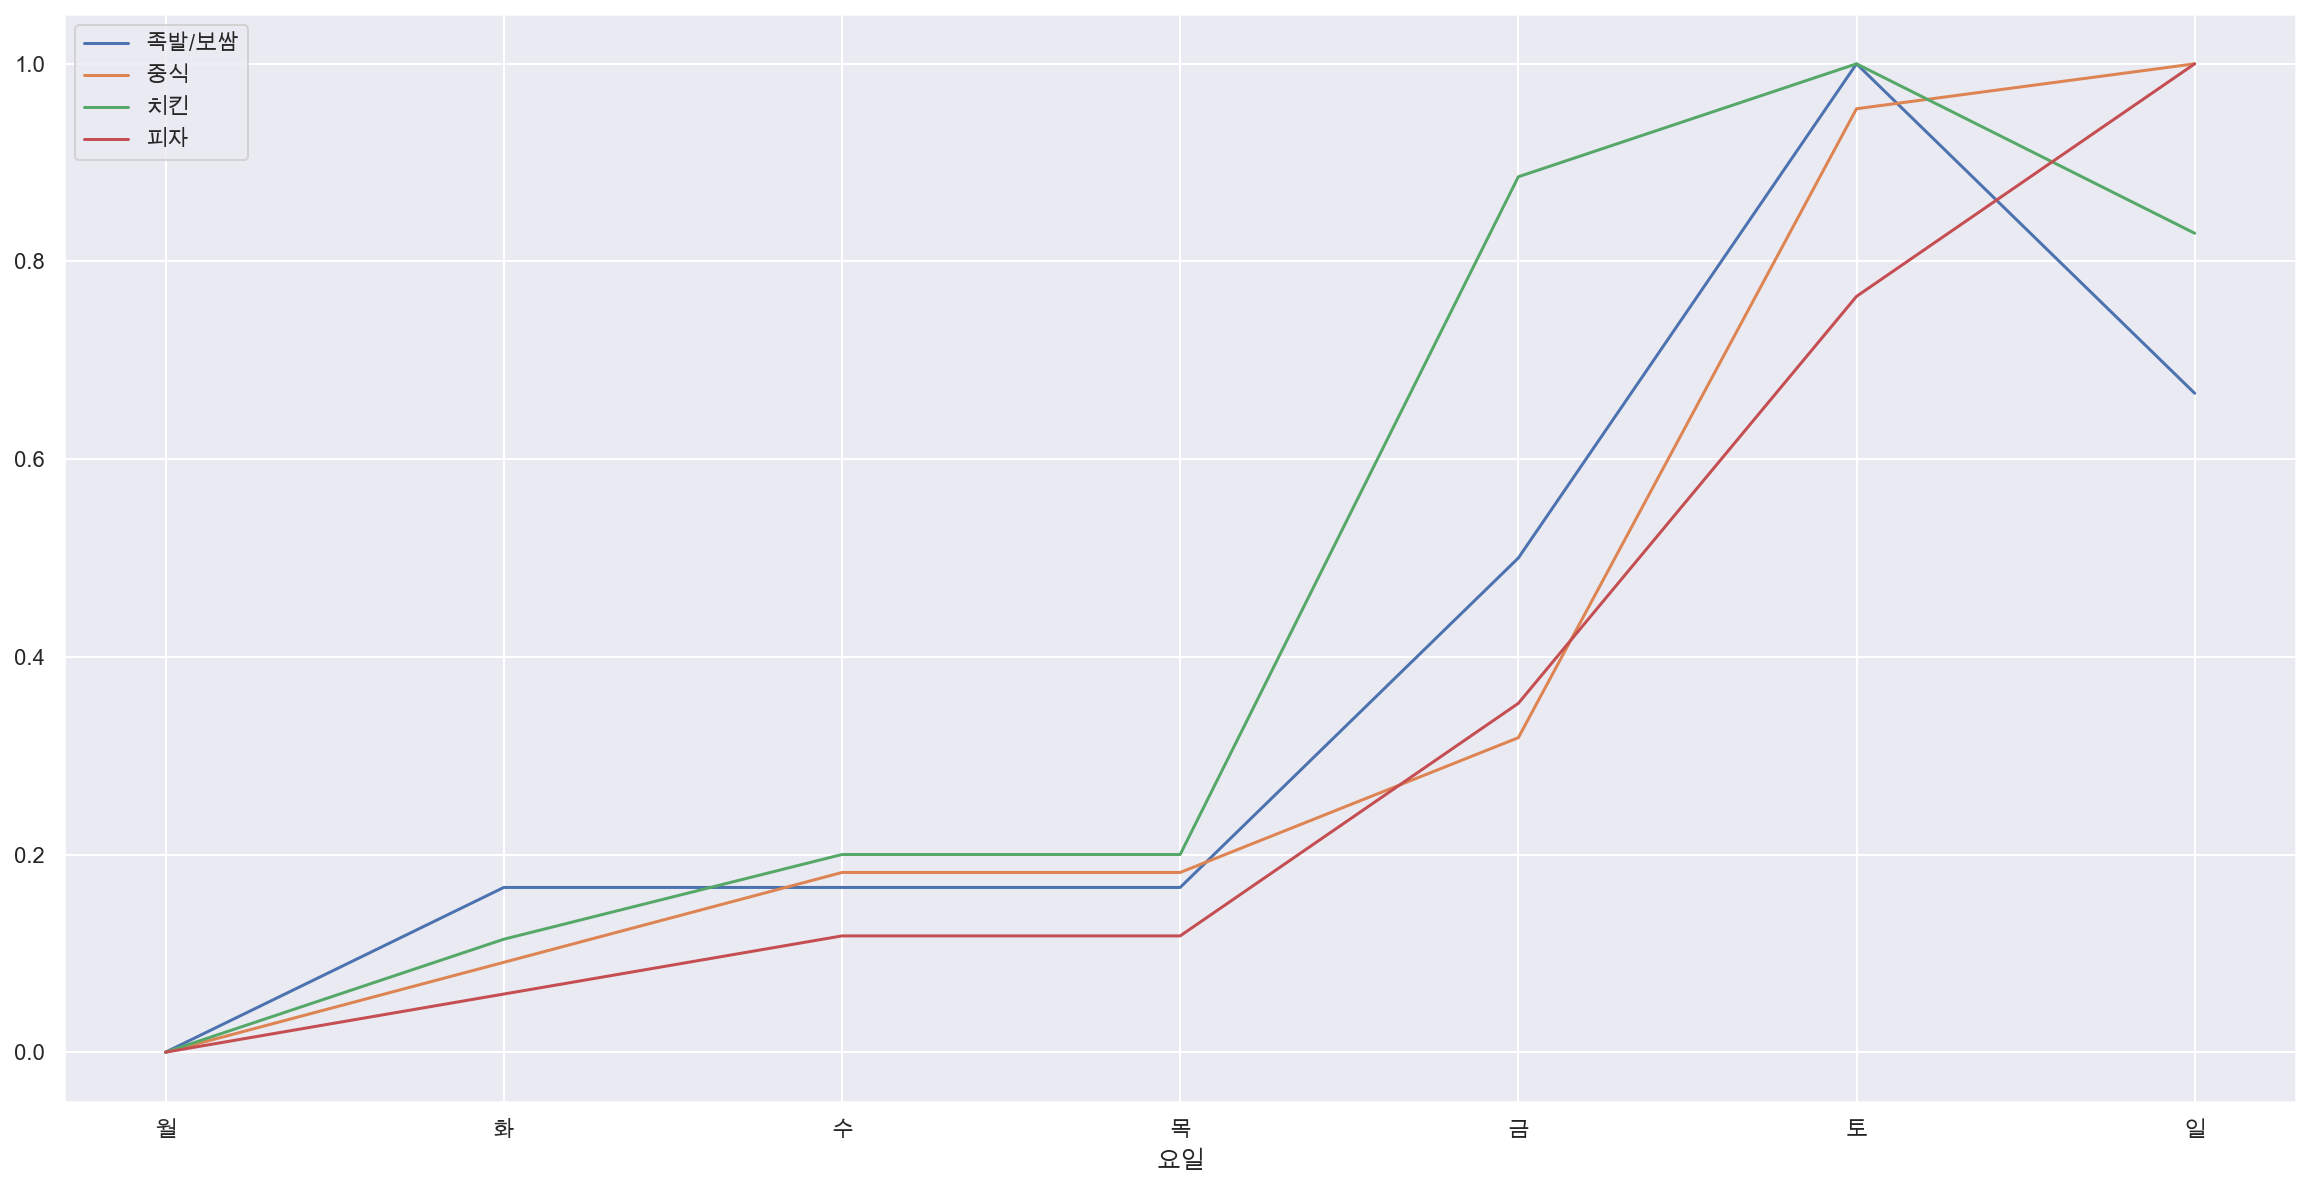

In [15]:
day_order_norm.plot.line(x="요일", figsize=(20,10))
plt.show()

### 시간대 / 업종별 주문량

In [18]:
time_order = data.pivot_table("통화건수", "시간대", "업종").round(1).reset_index()
time_order.head()

업종,시간대,족발/보쌈,중식,치킨,피자
0,0,5.0,5.3,6.3,5.0
1,1,5.1,5.3,5.2,5.0
2,2,5.0,5.3,5.1,5.0
3,3,5.0,5.2,5.0,5.0
4,4,5.0,5.1,5.0,5.0


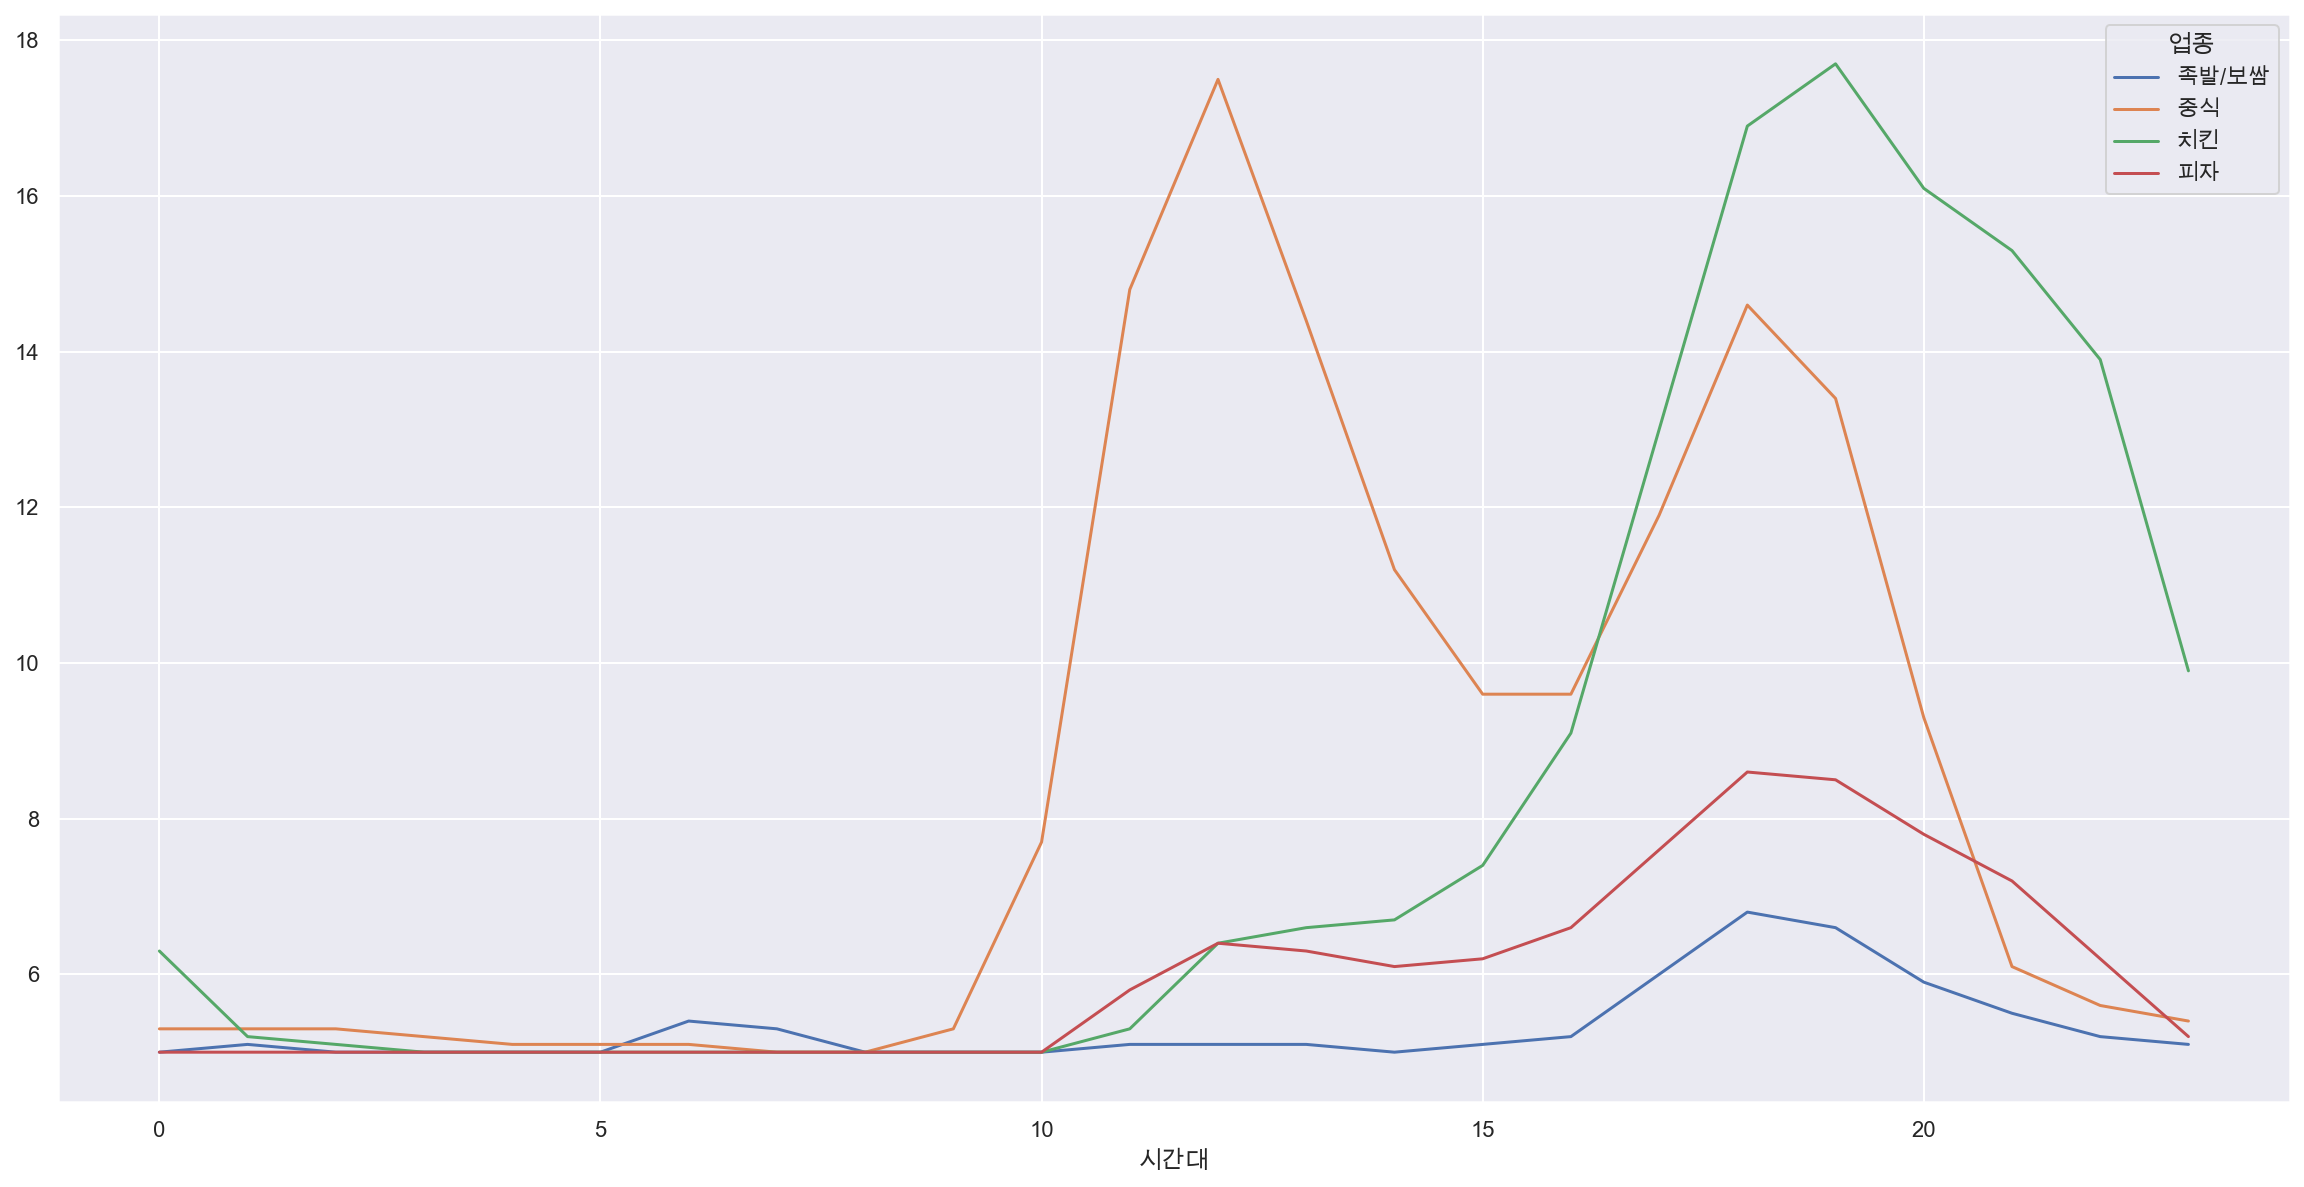

In [19]:
time_order.plot.line(x="시간대", figsize=(20,10))
plt.show()

In [ ]:
### 시간대 / 업종별 주문량 (정규화)

In [9]:
time_order = data.pivot_table("통화건수", "시간대", "업종").round(1).reset_index()
col = ["족발/보쌈", "중식", "치킨", "피자"]
time_order_norm = pd.concat([time_order["시간대"], (time_order[col]-time_order[col].min()) / (time_order[col].max()-time_order[col].min())], axis=1)
time_order_norm.head()

,시간대,족발/보쌈,중식,치킨,피자
0,0,0.000000,0.024,0.102362,0.0
1,1,0.055556,0.024,0.015748,0.0
2,2,0.000000,0.024,0.007874,0.0
3,3,0.000000,0.016,0.000000,0.0
4,4,0.000000,0.008,0.000000,0.0


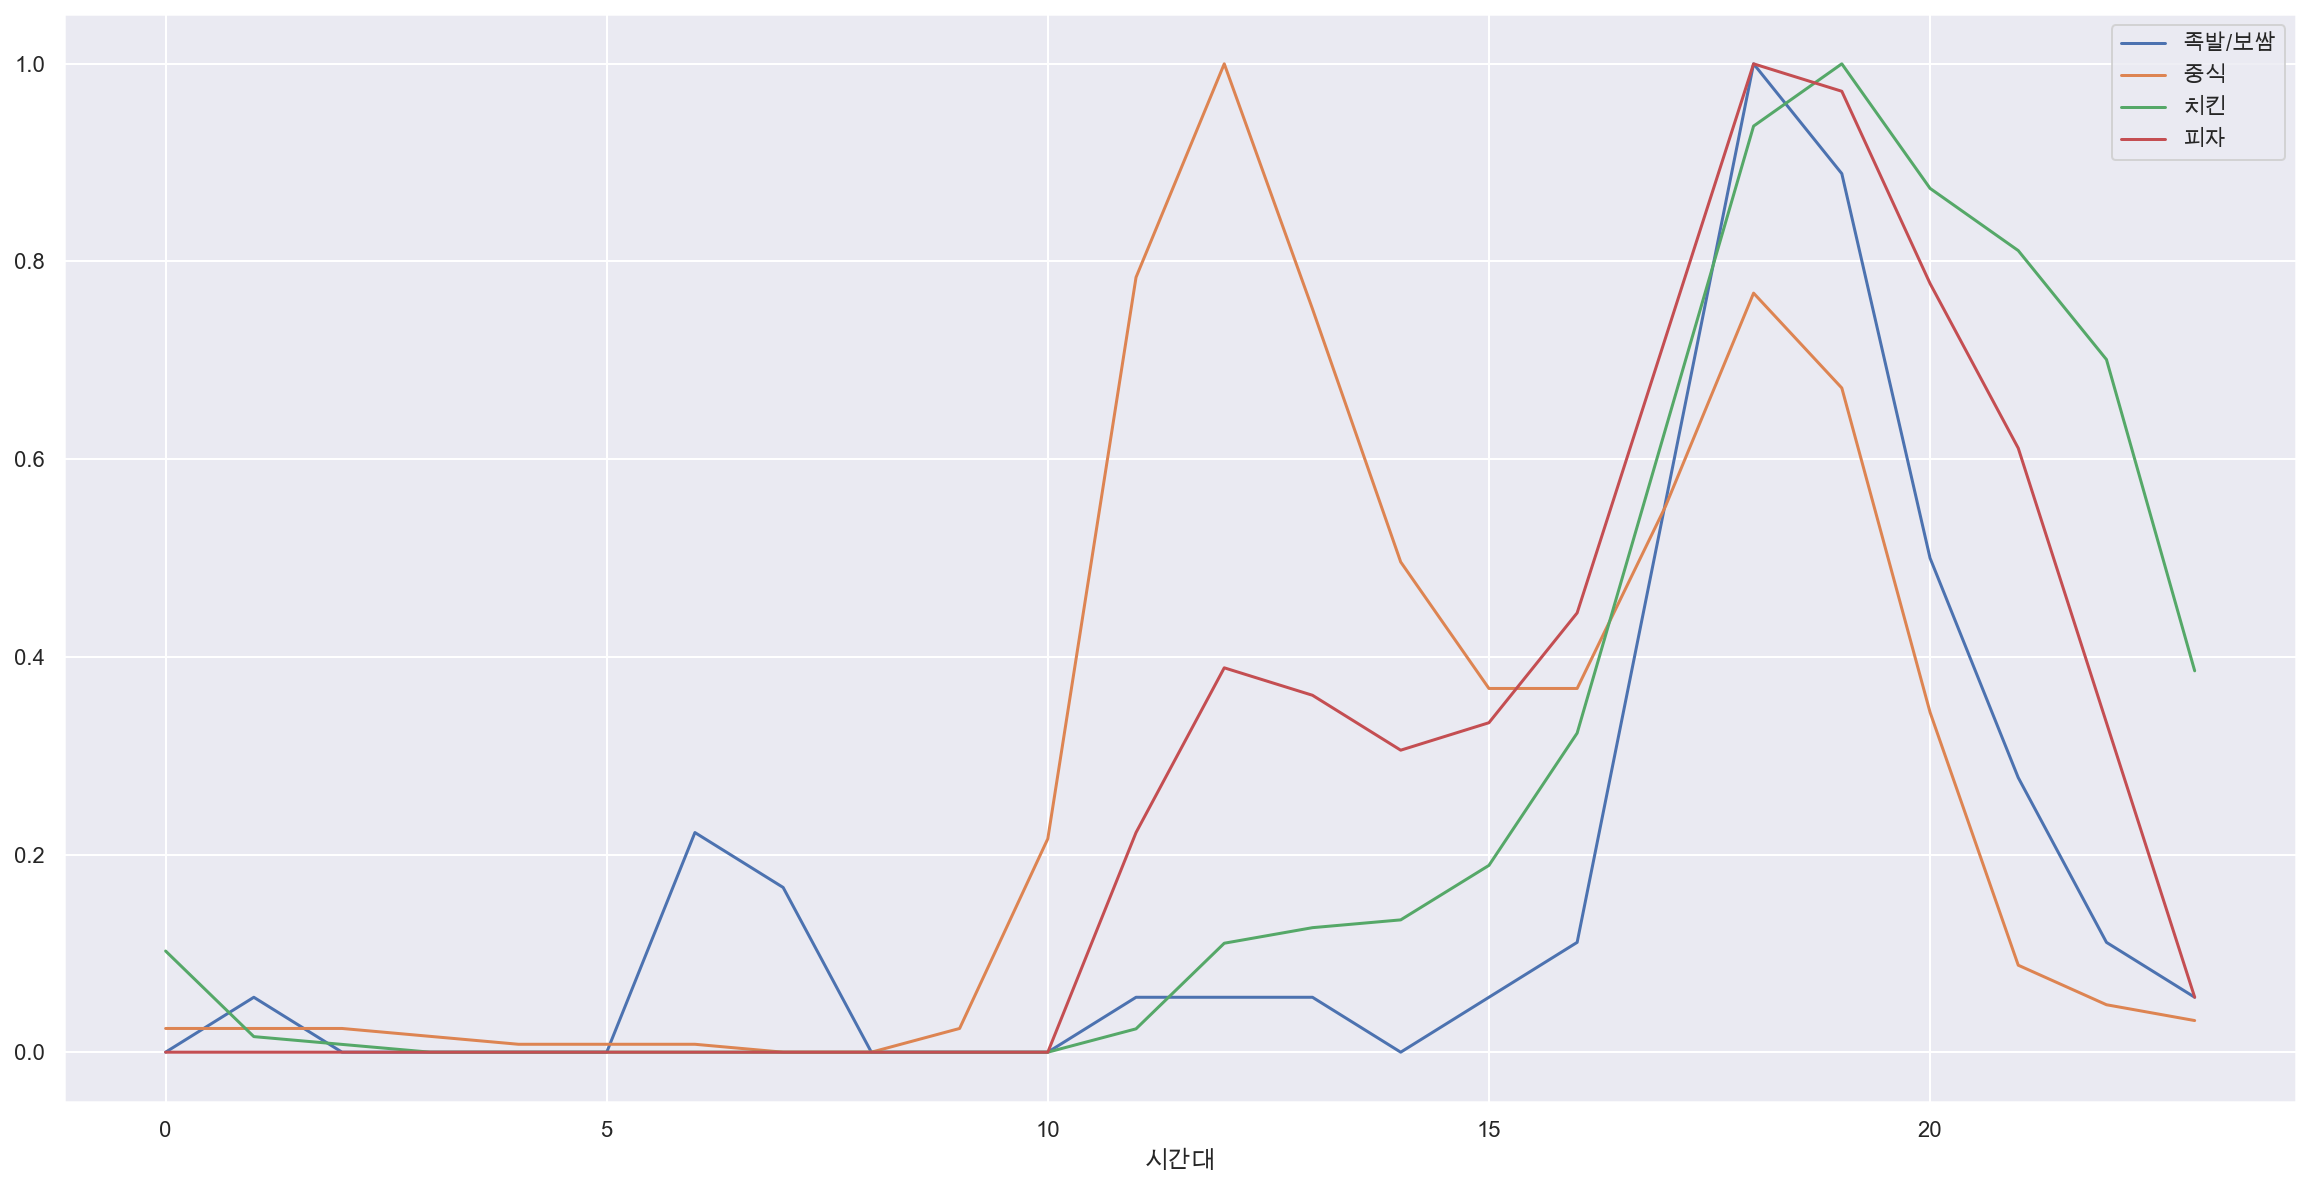

In [10]:
time_order_norm.plot.line(x="시간대", figsize=(20,10))
plt.show()

### *지역 / 업종별 주문량 예나님 쓰실 수 있음*

In [13]:
sigu_order = data.pivot_table("통화건수", "시군구", "업종").round(1)
sigu_order.tail()

업종,족발/보쌈,중식,치킨,피자
시군구,,,,
용산구,5.0,8.6,6.9,5.3
은평구,5.4,9.8,13.4,7.5
종로구,5.2,6.0,5.4,5.0
중구,5.4,13.0,9.7,6.7
중랑구,6.0,9.8,11.3,6.9


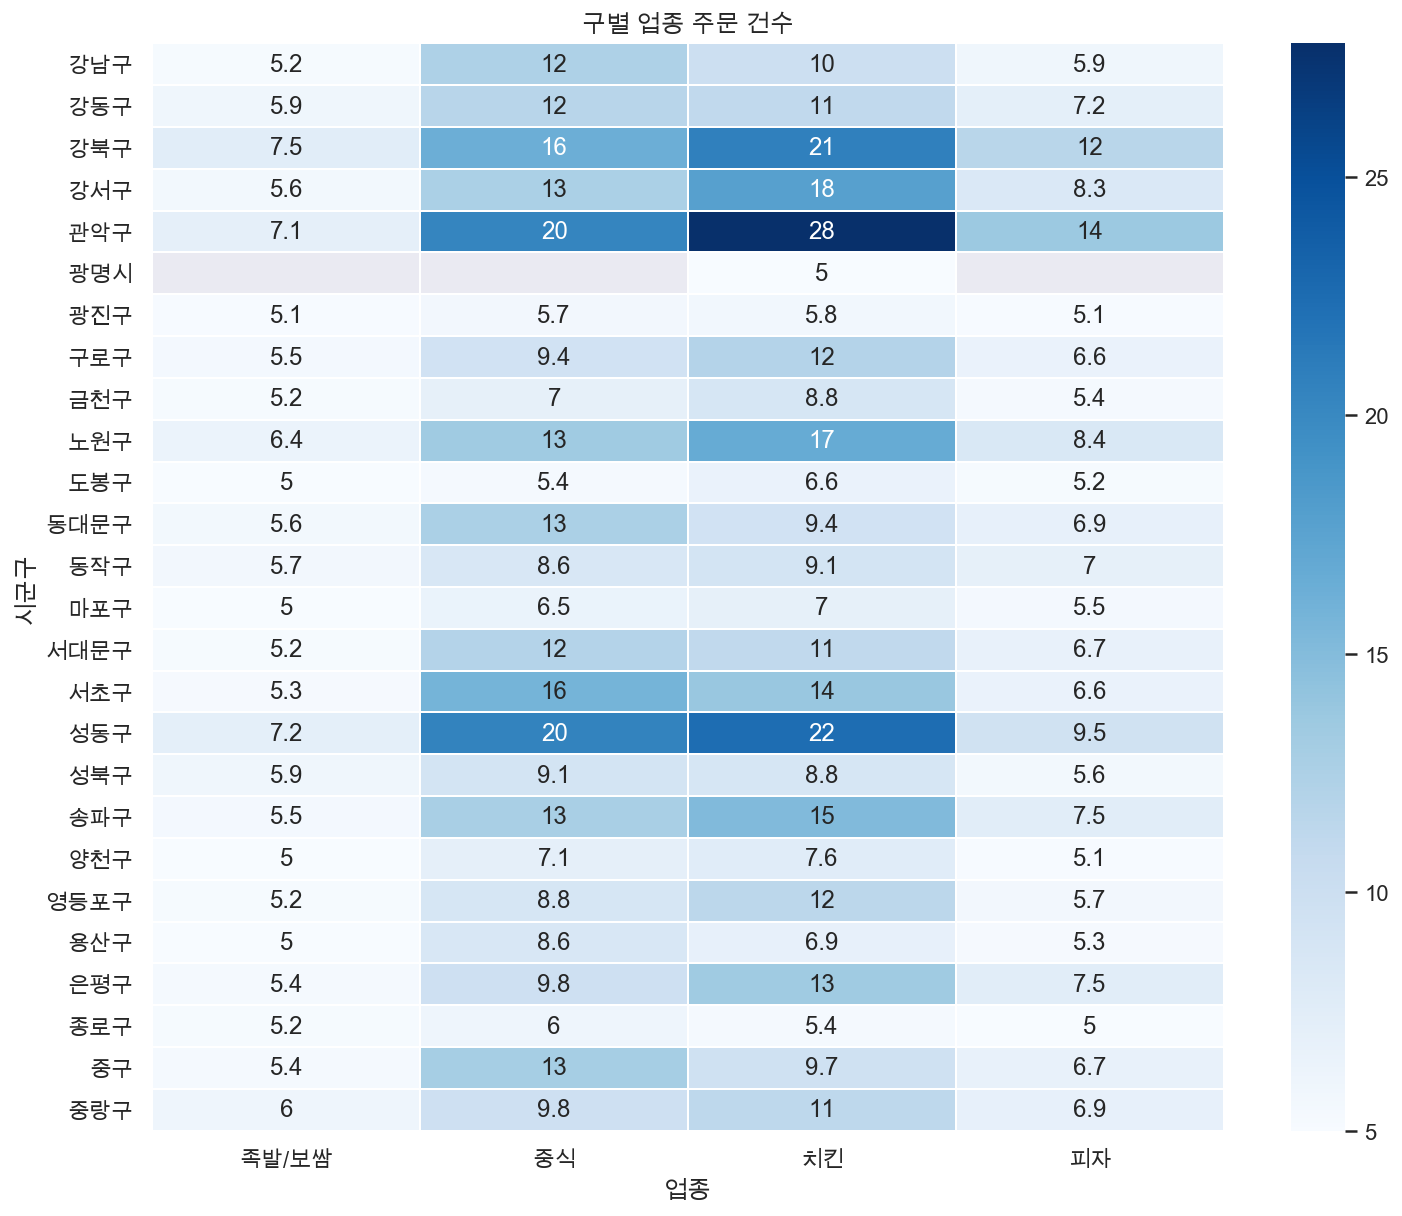

In [14]:
plt.figure(figsize=(12,10))
sns.heatmap(sigu_order,
            annot=True, linewidths=.5, cmap='Blues')
plt.title("구별 업종 주문 건수")
plt.show()